<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> Used Car Listing Price Prediction</h1>
    
</div>

<center><img src="https://raw.githubusercontent.com/anthonynamnam/anthonynamnam/main/icons/image/car-banner.png" alt="memes" width="600" /></center>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h2> Project Overview</h2>
    
Please kindly refer to the github repo of this project: <a href="https://github.com/anthonynamnam/brainstation_capstone#project-overview">Link</a>

    
</div>


---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h2> Notebook Overview</h2>
      
In this notebook, we will guide you through the following steps of working with data:

<ol>
    <font size=3><li><b>Data Preprocessing ⚙️</b></li></font>
    <p>Data preprocessing is the foundation upon which successful data analysis is built. Imagine data as raw materials, and preprocessing as the refining process to create a polished product. In this section, we'll focus on tasks such as data cleaning, feature scaling, and handling categorical variables. By the end of this phase, our data will be in a state where it's ready for in-depth exploration and analysis, setting the stage for actionable insights.</p>
    <font size=3><li><b>Exploratory Data Analysis 🔎</b></li></font>
    <p>Exploratory Data Analysis is like peeling back the layers of an onion. It allows us to uncover the hidden treasures and insights concealed within our dataset. During this phase, we will employ various statistical and visual techniques to uncover patterns, relationships, and anomalies in the data. EDA serves as a compass that guides us towards meaningful questions and hypotheses to explore further.</p>
    <font size=3><li><b>Statistical Analysis 📊</b></li></font>
    <p>Statistics is the language of data, and in this section, we'll harness its power to extract valuable insights. Our statistical analysis will involve hypothesis testing, correlation studies, and predictive modeling. By the end of this phase, we'll not only understand our data better but also have a solid basis for making data-driven decisions and recommendations.</p>

</ol>

Let's dive in and get our data in tip-top shape for the next phases of our project!

    
    
</div>


---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="2-toc"> 
    <h2> Table of Contents </h2>
</a>
    
<ul>    
    <li> <a href="#2-setup">Notebook Set Up</a></li>
    <li> <a href="#2-func">Functions</a></li>
    <li> <a href="#2-load">Data Loading</a></li>
    <li> <a href="#2-preprocess">Data Preprocessing</a></li>
    <li> <a href="#2-full-eda">Exploratory Data Analysis</a></li>
    <li> <a href="#2-stat-ana">Statistics Analysis</a></li>
    <li> <a href="#2-learn">Learning/Takeaway</a></li>
</ul>
    
</div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="2-setup"> 
    <h2> Notebook Set Up </h2>
</a>

<b>Table of Contents for this part: </b>
<ul>    
    <li> <a href="#2-install">Install Library</a></li>
    <li> <a href="#2-import">Import Library</a></li>
    <li> <a href="#2-constant">Global Constant</a></li>
</ul>
    
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-install">
<h3> Install Library </h3>
</a>
</div>

In [186]:
# Install required library if needed
!pip install pyarrow

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-import">
<h3> Import Library </h3>
</a>
</div>

In [187]:
# Import basic library
import os
import math
import time
import sys
from typing import Optional

# Import data science tools
import numpy as np
import pandas as pd

# Import data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Import predictive modelling modules
import statsmodels.api as sm

# Import statistics test
from scipy.stats import kruskal,chi2_contingency

import warnings

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-constant">
<h3> Global Constant </h3>
</a>
</div>

In [188]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
warnings.filterwarnings('ignore')

[Back-to-top](#2-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="2-func"> 
    <h2> Functions </h2>
</a>

<b>Table of Contents for this part: </b>
<ul>    
    <li> <a href="#2-func-print">Functions for Dataframe Info</a></li>
    <li> <a href="#2-func-edit">Functions for Edit DataFrame</a></li>
    <li> <a href="#2-func-general">Functions for General Purpose</a></li>
</ul>
    
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-func-print">
<h3> Helper Functions (Print Info) </h3>
</a>
</div>

In [189]:
# Helper Functions to print df info and statement
import pandas as pd

def print_num_row(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Retrieve the number of rows of dataframe and print it as a statement.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    df = pd.DataFrame(data = {"height":[147,190],"weight":[47,72],"age":[12,28]},index = [0,1])
    print_num_row(df)  =>
        |
        | "The dataframe has 2 rows of record now."
        |
    
    
    """
    print(f"The dataframe has {df.shape[0]} rows of record now.")
    return
    

def print_num_col(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Retrieve the number of columns of dataframe and print it as a statement.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    df = pd.DataFrame(data = {"height":[147,190],"weight":[47,72],"age":[12,28]},index = [0,1])
    print_num_col(df) => 
        |
        | "The dataframe has 3 columns now."
        |
    
    
    """
    print(f"The dataframe has {df.shape[1]} columns now.")
    return
        
def print_dim(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Retrieve the shape of dataframe and print it as a statement.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,72],"age":[12,28]},index = [0,1])
    print_dim(abc_df) =>
        |
        | "There are 2 rows and 3 columns in this dataframe now."
        |
    
    
    """
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataframe now.")
    return


def print_null_count(df: pd.DataFrame,cols:list = []) -> None:
    """
    Description
    -----
    Count the null value in each columns.
    If `cols` is provided, only show the null value count for the columns in `cols`. 
    Otherwise, show null value count for all columns.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    cols (list): the column names to show the null value count. Default: []
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,np.nan],"age":[np.nan,28]},index = [0,1])
    print_null_count(abc_df) => 
        |
        | === Null Count ===
        | height    0
        | weight    1
        | age       2
        | dtype: int64
        |
        
    print_null_count(abc_df,cols=["age"]) => 
        |
        | === Null Count ===
        | Column `age`: 2
        |
        
    print_null_count(abc_df,cols=["age","weight"]) => 
        |
        | === Null Count ===
        | Column `age`: 2
        | Column `weight`: 1
        |
    
    """
    if len(cols) == 0:
        null_count = df.isnull().sum()
        
        print("=== Null Count ===")
        print(null_count)
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        
        print("=== Null Count ===")
        for col in cols:
            print(f"Column `{col}`: {null_count[col]}")
    return 


def print_null_pct(df: pd.DataFrame,cols:list = []) -> None:
    """
    Description
    -----
    Count the null percentage in each columns.
    If `cols` is provided, only show the null percentage for the columns in `cols`. 
    Otherwise, show null percentage for all columns.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    cols (list): the column names to show the null percentage. Default: []
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,np.nan],"age":[np.nan,np.nan]},index = [0,1])
    print_null_pct(abc_df) => 
        |
        | === Null Count Precentage ===
        | height      0.0%
        | weight     50.0%
        | age       100.0%
        | dtype: object
        |
        
    print_null_pct(abc_df,cols=["weight"]) => 
        |
        | === Null Count Precentage ===
        | Column weight: 50.0%
        |
    
    """
    total_row = df.shape[0]
    if len(cols) == 0:
        null_count = df.isnull().sum()
        null_pct = null_count / total_row * 100
        
        print("=== Null Count Precentage ===")
        print(null_pct.round(2).astype(str)+"%")
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        null_pct = null_count / total_row * 100

        print("=== Null Count Precentage ===")
        for col in cols:
            print(f"Column {col}: {round(null_pct[col],4)}%")
    return

def print_duplicated_count(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Count the number of duplicated rows.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190,147],"weight":[47,np.nan,47],"age":[13,27,13]},index = [0,1,2])
    print_duplicated_count(abc_df) => 
        |
        | There are 1 duplicated rows
        | 
        
    """
    print(f"There are {df.duplicated().sum()} duplicated rows")
    return



<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-func-edit">
<h3> Helper Functions (Edit Dataframe) </h3>
</a>
</div>

In [190]:
def drop_cols_if_exist(df: pd.DataFrame,cols_to_drop:list) -> pd.DataFrame:
    """
    Description
    -----
    Drop a column from a dataframe with inplace = True. Only execute the dropping if the cols exist.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    cols_to_drop (list): the list of column to be dropped
    
    Returns
    -----
    df (pd.DataFrame): the dataframe with columns dropped
    
    Example
    -----
    # Create a DataFrame
    abc_df = pd.DataFrame(data = {"height":[147,190,147],"weight":[47,np.nan,47],"age":[13,27,13]},index = [0,1,2])
    print(abc_df)  =>
        |
        |    height  weight  age
        | 0     147    47.0   13
        | 1     190     NaN   27
        | 2     147    47.0   13
        |
        
    # Drop columns if exist
    dropped_abc_df = drop_cols_if_exist(abc_df,cols_to_drop=["weight"])
    print(dropped_abc_df)   =>
        | Successfully dropped columns: {'weight'}
        |    height  age
        | 0     147   13
        | 1     190   27
        | 2     147   13
    
    
    """
    intersect_cols = set(cols_to_drop).intersection(df.columns)
    df.drop(columns=intersect_cols,inplace=True)
    print(f"Successfully dropped columns: {intersect_cols}")
    return df    

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-func-general">
<h3> General Helper Functions </h3>
</a>
</div>

In [191]:
# Other Helper Functions
def flatten_list(l:list) -> list:
    """
    Description
    -----
    Function to flatten a 2D list into 1D list
    
    Args
    -----
    l (list): the original 2D list
    
    Returns
    -----
    flatten_list (list): the flattened list
    
    Example
    -----
    abc_list = [[2,3,5],4,6,[9,1,8],7,10]
    flatten_list(abc_list) =>
        | 
        | [2, 3, 5, 4, 6, 9, 1, 8, 7, 10]
        | 
    
    """
    flatten_list = []
    for sublist in l:
        if isinstance(sublist,list):
            for item in sublist:
                flatten_list.append(item)
        else:
            flatten_list.append(sublist)
    return flatten_list

[Back-to-top](#2-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="2-load"> 
    <h2> Data Loading </h2>
</a>
<b>Table of Contents for this part: </b>
<ul>    
    <li> <a href="#2-load-clean">Load Dataset</a></li>
    <li> <a href="#2-sanity-clean">Sanity Check</a></li>
</ul>
    
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-load-clean">
<h3> Load Cleaned Dataset </h3>
</a>
</div>

In [192]:
# Define dtype for cleaned dataset
CLEAN_COL_DTYPE = {
    "vin":str,
    "miles":float,
    "year":int,
    "make":str,
    "model":str,
    "trim":str,
    "body_type":str,
    "vehicle_type":str,
    "drivetrain":str,
    "transmission":str,
    "fuel_type":str,
    "engine_size":float,
    "engine_block":str,
    "city":str,
    "state":str,
    "price_range":int
}

In [193]:
# First, we read the cleaned dataset
df = pd.read_parquet(path = "data/cleaned-data.parquet",
                     columns = CLEAN_COL_DTYPE)
df.reset_index(drop = True, inplace=True)

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-sanity-clean">
<h3> Sanity Check on Cleaned Data </h3>
</a>
</div>

In [194]:
df.isna().sum()

vin             0
miles           0
year            0
make            0
model           0
trim            0
body_type       0
vehicle_type    0
drivetrain      0
transmission    0
fuel_type       0
engine_size     0
engine_block    0
city            0
state           0
price_range     0
dtype: int64

In [195]:
df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,price_range
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Edmundston,NB,5
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Notre-dame-des-pins,QC,5
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Coquitlam,BC,5
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Pickering,ON,5
4,19UNC1B03HY800063,18281.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Montral,QC,5


In [196]:
print_dim(df)

There are 4141538 rows and 16 columns in this dataframe now.


In [197]:
print_duplicated_count(df)

There are 0 duplicated rows


[Back-to-top](#2-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="2-preprocess"> 
    <h2> Data Proprocessing </h2>
</a>

<b>Table of Contents for this part: </b>
<ul>    
    <li> <a href="#2-log">Log Transformation</a></li>
    <li> <a href="#2-flatten">Column Flattening</a></li>
    <li> <a href="#2-dummy">Possible Dummy Encoding Opportunity</a></li>
    <li> <a href="#2-save-process">Save Processed Dataset</a></li>
</ul>
    

For data preprocessing, there are several things to be completed.
1. Log-transformation on `miles` column
2. `fuel_type` column flattening (as it has multiple values in each cell)
2. Categorical Data Enconding
3. Same vehicle history 

In this section, we will go through #1 and #2 here and left the #3 ad #4 in the feature engineering part.
    
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-log">
    <h3> Column <b><i>miles</i></b> with Log transformation </h3>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- According to our EDA sections, we found that the column `miles` follow log-normal distribution. 
- Now, we perform log transformation on it.
    
<div>

In [198]:
df["log_miles"] = np.log(df["miles"]+1)

In [199]:
df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,price_range,log_miles
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Edmundston,NB,5,9.207035
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Notre-dame-des-pins,QC,5,8.697680
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Coquitlam,BC,5,10.095883
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Pickering,ON,5,8.800566
4,19UNC1B03HY800063,18281.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Montral,QC,5,9.813672


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-flatten">
    <h3> Column <b><i>fuel_type</i></b> Flattening </h3>
</a>
</div>

#### Multiple values in One Column

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>
    
- It seems that there are several common values in the column `fuel_type` in one cell.
- For example: \['Electric', 'Premium Unleaded'\] in one cell etc.
- Let's encode each of them into a list to get the distinct fuel types
- Example:
|`fuel_type`|
|:---:|
|Electric / Premium Unleaded|
- Encoded: 
|`Electric`|`Diesel`|`Premium Unleaded`|`Hydrogen`|
|:---:|:---:|:---:|:---:|
|1|0|1|0|
    
<div>

In [200]:
def encode_fuel_type(s:str)-> list:
    """
    Description
    -----
    As there are multiple values in one cell in the columns `fuel_type`. We need to encode them into different columns as above.
    This function is specific for the `fuel_type` column to encode the string into a list of supported fuel types.
    
    Args
    -----
    s (str): the string in the column `fuel_type`
    
    Returns
    -----
    s5 (list): encoded list of fuel types
    
    Example:
    -----
    encode_fuel_type('Diesel; E85 / Unleaded') =>
        |
        | ['Diesel','E85','Unleaded']
        |
        
    encode_fuel_type('Compressed Natural Gas / Lpg') =>
        |
        | ['CompressedNaturalGas','Lpg']
        |
        
    encode_fuel_type('Electric / Premium Unleaded; Premium Unleaded') =>
        |
        | ['Electric','PremiumUnleaded']
        |
        
    
    """
    # Remove empty space
    s1 = s.replace(" ","")
    # Split by ';'
    s2 = s1.split(";")
    # The, split by ';'
    s3 = list(map(lambda x:x.split("/"),s2))
    # Flatten the list into 1-D list
    s4 = flatten_list(s3)
    # Drop duplicates
    s5 = list(set(s4))
    
    return s5

In [201]:
# List out all unique value in column `fuel_type`
fuel_type_list = list(set(df["fuel_type"]))
fuel_type_list

['Unleaded / Premium Unleaded',
 'Compressed Natural Gas / Lpg',
 'Unleaded / Electric',
 'Unleaded; Unleaded / E85',
 'E85 / Unleaded; Unleaded',
 'E85 / Unleaded; Unleaded / Unleaded',
 'Diesel; Unleaded',
 'Premium Unleaded; Premium Unleaded / E85',
 'Hydrogen',
 'Premium Unleaded',
 'Diesel / Premium Unleaded',
 'Unleaded / Unleaded',
 'E85',
 'Compressed Natural Gas',
 'E85 / Premium Unleaded; E85 / Unleaded',
 'Electric / Premium Unleaded; Premium Unleaded',
 'Electric / E85',
 'E85 / Unleaded; Unleaded / E85',
 'Electric',
 'Electric / Premium Unleaded; Electric / Unleaded',
 'Unleaded / E85',
 'Premium Unleaded; Unleaded',
 'M85 / Unleaded',
 'Compressed Natural Gas / Unleaded',
 'Diesel; E85 / Unleaded',
 'Biodiesel',
 'Premium Unleaded / Unleaded',
 'Premium Unleaded / E85',
 'E85 / Unleaded',
 'Diesel',
 'Unleaded',
 'Compressed Natural Gas; Unleaded',
 'E85 / Unleaded; Premium Unleaded',
 'Electric / Premium Unleaded',
 'E85; E85 / Unleaded',
 'Electric / Hydrogen',
 'E85 /

In [202]:
# Flatten the unique value in column `fuel_type`
encode_list = list(map(encode_fuel_type,fuel_type_list))

# It is too long, only show top 20 values
encode_list[:20]

[['Unleaded', 'PremiumUnleaded'],
 ['CompressedNaturalGas', 'Lpg'],
 ['Unleaded', 'Electric'],
 ['Unleaded', 'E85'],
 ['Unleaded', 'E85'],
 ['Unleaded', 'E85'],
 ['Diesel', 'Unleaded'],
 ['E85', 'PremiumUnleaded'],
 ['Hydrogen'],
 ['PremiumUnleaded'],
 ['Diesel', 'PremiumUnleaded'],
 ['Unleaded'],
 ['E85'],
 ['CompressedNaturalGas'],
 ['PremiumUnleaded', 'Unleaded', 'E85'],
 ['Electric', 'PremiumUnleaded'],
 ['Electric', 'E85'],
 ['Unleaded', 'E85'],
 ['Electric'],
 ['Unleaded', 'Electric', 'PremiumUnleaded']]

#### Distinct Value in Column `fuel_type`

In [203]:
encode_flat_list = flatten_list(encode_list)
encode_flat_list = list(set(encode_flat_list))
encode_flat_list

['Electric',
 'CompressedNaturalGas',
 'Lpg',
 'PremiumUnleaded',
 'E85',
 'Diesel',
 'Unleaded',
 'M85',
 'Hydrogen',
 'Biodiesel']

In [204]:
print(f"There are {len(encode_flat_list)} types of fuels in column `fuel_type`.")

There are 10 types of fuels in column `fuel_type`.


#### Record Occurrence for Encoding

In [205]:
df.reset_index(drop = True,inplace = True)
df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,city,state,price_range,log_miles
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Edmundston,NB,5,9.207035
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Notre-dame-des-pins,QC,5,8.697680
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Coquitlam,BC,5,10.095883
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Pickering,ON,5,8.800566
4,19UNC1B03HY800063,18281.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,Montral,QC,5,9.813672


In [206]:
# Set up variable for iteration
index_list = []
fuel_dict = {}
for fuel in encode_flat_list:
    fuel_dict[f"fuel_{fuel}"] = []   
df_len = round(df.shape[0] / 1000000,2)

# Record the occurrence
for ind, row in df.iterrows():
    
    # Show status
    if (ind+1) % 100000 == 0:
        print(f"Encoded rows: {round((ind+1)/1000000,1)}0M / {df_len}M rows")
        
    # Mark the index
    index_list.append(ind)
    
    # Decode the fuel_type
    encoded_fuel_set = set(encode_fuel_type(row["fuel_type"]))

    for fuel in encode_flat_list:
        if set([fuel]).issubset(encoded_fuel_set):
            fuel_dict[f"fuel_{fuel}"].append(1)
        else:
            fuel_dict[f"fuel_{fuel}"].append(0)
            
fuel_encoded_df = pd.DataFrame(fuel_dict,index = index_list)
print(f"Encoding Completed...")

Encoded rows: 0.10M / 4.14M rows
Encoded rows: 0.20M / 4.14M rows
Encoded rows: 0.30M / 4.14M rows
Encoded rows: 0.40M / 4.14M rows
Encoded rows: 0.50M / 4.14M rows
Encoded rows: 0.60M / 4.14M rows
Encoded rows: 0.70M / 4.14M rows
Encoded rows: 0.80M / 4.14M rows
Encoded rows: 0.90M / 4.14M rows
Encoded rows: 1.00M / 4.14M rows
Encoded rows: 1.10M / 4.14M rows
Encoded rows: 1.20M / 4.14M rows
Encoded rows: 1.30M / 4.14M rows
Encoded rows: 1.40M / 4.14M rows
Encoded rows: 1.50M / 4.14M rows
Encoded rows: 1.60M / 4.14M rows
Encoded rows: 1.70M / 4.14M rows
Encoded rows: 1.80M / 4.14M rows
Encoded rows: 1.90M / 4.14M rows
Encoded rows: 2.00M / 4.14M rows
Encoded rows: 2.10M / 4.14M rows
Encoded rows: 2.20M / 4.14M rows
Encoded rows: 2.30M / 4.14M rows
Encoded rows: 2.40M / 4.14M rows
Encoded rows: 2.50M / 4.14M rows
Encoded rows: 2.60M / 4.14M rows
Encoded rows: 2.70M / 4.14M rows
Encoded rows: 2.80M / 4.14M rows
Encoded rows: 2.90M / 4.14M rows
Encoded rows: 3.00M / 4.14M rows
Encoded ro

In [207]:
# Check the enconded dataframe
fuel_encoded_df.head()

,fuel_Electric,fuel_CompressedNaturalGas,fuel_Lpg,fuel_PremiumUnleaded,fuel_E85,fuel_Diesel,fuel_Unleaded,fuel_M85,fuel_Hydrogen,fuel_Biodiesel
0,1,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0


#### Concatanate Encoded Dataframe

In [208]:
encoded_df = pd.concat([df,fuel_encoded_df],axis = 1)
encoded_df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,...,fuel_Electric,fuel_CompressedNaturalGas,fuel_Lpg,fuel_PremiumUnleaded,fuel_E85,fuel_Diesel,fuel_Unleaded,fuel_M85,fuel_Hydrogen,fuel_Biodiesel
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
4,19UNC1B03HY800063,18281.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0


#### Drop Column `fuel_type`

In [209]:
encoded_df = drop_cols_if_exist(encoded_df,["fuel_type"])

Successfully dropped columns: {'fuel_type'}


#### Sanity Check

In [210]:
encoded_df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,...,fuel_Electric,fuel_CompressedNaturalGas,fuel_Lpg,fuel_PremiumUnleaded,fuel_E85,fuel_Diesel,fuel_Unleaded,fuel_M85,fuel_Hydrogen,fuel_Biodiesel
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0
4,19UNC1B03HY800063,18281.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,1,0,0,0,0,0,0


In [211]:
print_dim(encoded_df)

There are 4141538 rows and 26 columns in this dataframe now.


---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-dummy">
    <h3> Categorical Columns Encoding </h3>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>

- For categorical encoding such as `dummy encoding` / `one-hot encoding`, we will leave it in `feature engineering` part.
- Our potential encoding methods would be as follow:
    1. `Dummy Encoding` (keep all categories + remove one column for dummy variable trap)
    2. `Dummy Encoding` (with fixed number of category, i.e. top 10 most frequent categories)
    3. `Dummy Encoding` (with value counts percentage threshold, i.e. only keep categories with more than X% of total records)
    4. `Ordinal Encoding` (for category with ordinal meaning)
    5. `Count Encoding`
    6. `Target Encoding`  
                    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-save-process">
    <h3> Save the Processed Dataset </h3>
</a>
</div>

In [212]:
# Remove duplicates before saving
encoded_df.drop_duplicates(inplace=True)

# Save as parquet
encoded_df.to_parquet(path="data/processed-data.parquet",
                      index = False)
print("Processed Data Saved...")

Processed Data Saved...


[Back-to-top](#2-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="2-full-eda"> 
    <h2> Exploratory Data Analysis </h2>
</a>
<b>Table of Contents for this part: </b>
<ul>    
    <li> <a href="#2-load-process">Loaded Processed Data</a></li>
    <li> <a href="#2-num-cat-col">Numerical and Categorical Columns</a></li>
    <li> <a href="#2-num-uni">Univariate Analysis for Numerical Data</a></li>
    <li> <a href="#2-cat-uni">Univariate Analysis for Categorical Data</a></li>
    <li> <a href="#2-num-bi">Bivariate Analysis for Numerical Data</a></li>
    <li> <a href="#2-cat-bi">Bivariate Analysis for Categorical Data</a></li>
</ul>
    
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-load-process">
    <h3> Loading Processed Data </h3>
</a>
</div>

In [213]:
# Define dtype for cleaned dataset
PROCESSED_COL_DTYPE = {
    "vin":str,
    "miles":float,
    "year":int,
    "make":str,
    "model":str,
    "trim":str,
    "body_type":str,
    "vehicle_type":str,
    "drivetrain":str,
    "transmission":str,
    "engine_size":float,
    "engine_block":str,
    "city":str,
    "state":str,
    "price_range":int,
    "fuel_PremiumUnleaded":int,
    "fuel_Unleaded":int,
    "fuel_Hydrogen":int,
    "fuel_CompressedNaturalGas":int,
    "fuel_M85":int,
    "fuel_Electric":int,
    "fuel_E85":int,
    "fuel_Diesel":int,
    "fuel_Biodiesel":int,
    "fuel_Lpg":int,
}

In [214]:
# First, we read the cleaned & processed dataset
df = pd.read_parquet(path = "data/processed-data.parquet",
                     columns = PROCESSED_COL_DTYPE)
df.reset_index(drop = True, inplace=True)

#### Sanity Check on Cleaned Data

In [215]:
df.isna().sum()

vin                          0
miles                        0
year                         0
make                         0
model                        0
trim                         0
body_type                    0
vehicle_type                 0
drivetrain                   0
transmission                 0
engine_size                  0
engine_block                 0
city                         0
state                        0
price_range                  0
fuel_PremiumUnleaded         0
fuel_Unleaded                0
fuel_Hydrogen                0
fuel_CompressedNaturalGas    0
fuel_M85                     0
fuel_Electric                0
fuel_E85                     0
fuel_Diesel                  0
fuel_Biodiesel               0
fuel_Lpg                     0
dtype: int64

In [216]:
df.head()

,vin,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,...,fuel_PremiumUnleaded,fuel_Unleaded,fuel_Hydrogen,fuel_CompressedNaturalGas,fuel_M85,fuel_Electric,fuel_E85,fuel_Diesel,fuel_Biodiesel,fuel_Lpg
0,19UNC1B01HY800062,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,0,0,1,0,0,0,0
1,19UNC1B02HY800023,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,0,0,1,0,0,0,0
2,19UNC1B02HY800071,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,0,0,1,0,0,0,0
3,19UNC1B02LY800001,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,0,0,1,0,0,0,0
4,19UNC1B03HY800063,18281.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,...,1,0,0,0,0,1,0,0,0,0


In [217]:
print_dim(df)

There are 4141534 rows and 25 columns in this dataframe now.


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-num-cat-col">
    <h3> Numerical and Categorical Columns </h3>
</a>
</div>

In [218]:
df.dtypes

vin                           object
miles                        float64
year                         float64
make                          object
model                         object
trim                          object
body_type                     object
vehicle_type                  object
drivetrain                    object
transmission                  object
engine_size                  float64
engine_block                  object
city                          object
state                         object
price_range                    int64
fuel_PremiumUnleaded           int64
fuel_Unleaded                  int64
fuel_Hydrogen                  int64
fuel_CompressedNaturalGas      int64
fuel_M85                       int64
fuel_Electric                  int64
fuel_E85                       int64
fuel_Diesel                    int64
fuel_Biodiesel                 int64
fuel_Lpg                       int64
dtype: object

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- Note that the `year` are in `float` type. Let's change it back to `int` type.
    
<div>

In [219]:
# Change data type
df["year"] = df["year"].astype(int)

# Double Check after changing
df["year"].dtypes

dtype('int64')

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>📜 Info:</b></font>

- For numerical and categorical, they have the following columns:
| # | Numerical Columns| Categorical Columns|
|:---:|:---|:---|
|1|`miles`|`make`|
|2|`year`|`model`|
|3|`engine_size`|`trim`|
|4|`fuel_Lpg`|`body_type`|
|5|`fuel_E85`|`vehicle_type`|
|6|`fuel_Diesel`|`drivetrain`|
|7|`fuel_PremiumUnleaded`|`transmission`|
|8|`fuel_CompressedNaturalGas`|`engine_block`|
|9|`fuel_Biodiesel`|`city`|
|10|`fuel_M85`|`state`|
|11|`fuel_Unleaded`||
|12|`fuel_Electric`||
|13|`fuel_Hydrogen`||
 
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-num-uni">
    <h3> Univariate Analysis - Numerical </h3>
</a>
</div>

#### Histogram for `miles`, `year` and `engine_size`

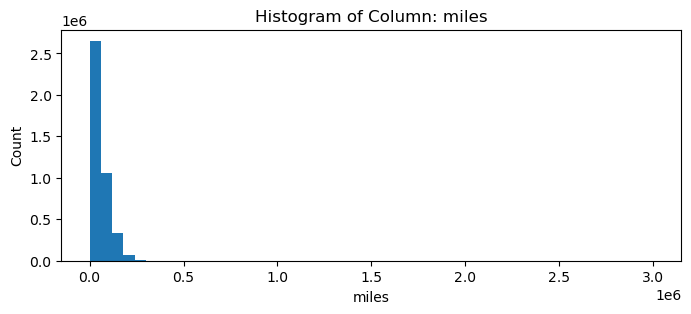

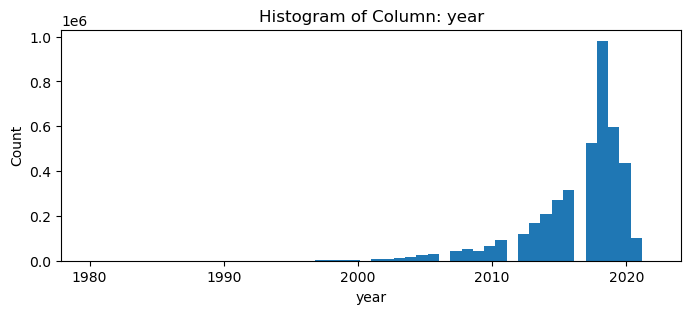

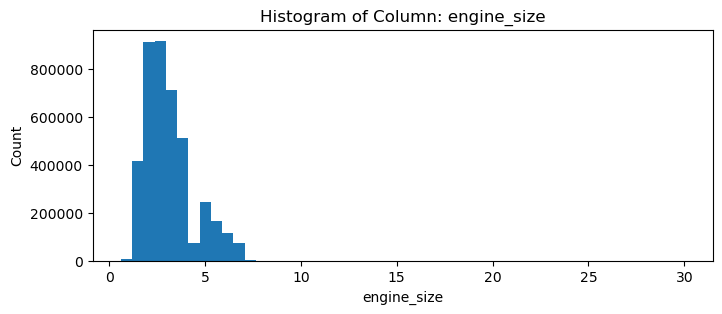

In [220]:
continuous_num_cols = ['miles', 'year', 'engine_size']

for num_col in continuous_num_cols:
    # Set up plot
    plt.figure(figsize=(8,3))

    # Plot
    plt.hist(encoded_df[num_col],bins = 50)
    
    # Title and Axis
    plt.title(f"Histogram of Column: {num_col}")
    plt.ylabel("Count")
    plt.xlabel(num_col)

    # Show plot
    plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- For `miles` and `engine_size`, we can see that most of the data lie on the left. There may be some extreme large values on the right end.
- For `year`, as it is time-related, the used car listing count increased from time to time.
- For `year`, there is a huge drop after 2020. The possible reason could be the impact from COVID outbreak in 2020.
- For `miles`, we can apply log transformation on it.

<div>

#### Replot for `miles` and `engine_size`
- Let's set the upper bound of `miles` plot to 250,000
- Let's set the upper bound of `engine_size` plot to 8

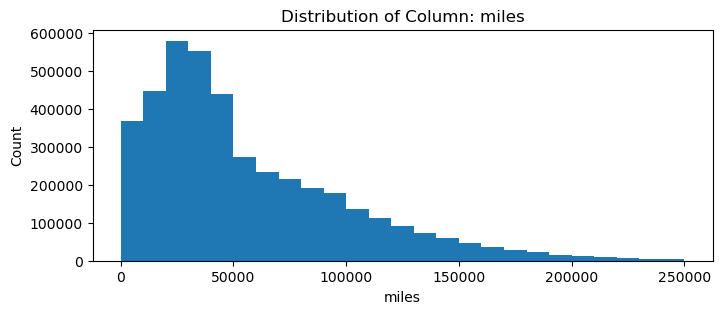

In [221]:
# Set up plot
plt.figure(figsize=(8,3))

# Plot Distribution
plt.hist(encoded_df[encoded_df["miles"]<=250000]["miles"],bins= 25)

# Title and Axis
plt.title(f"Distribution of Column: miles")
plt.ylabel("Count")
plt.xlabel("miles")

# Show plot
plt.show()

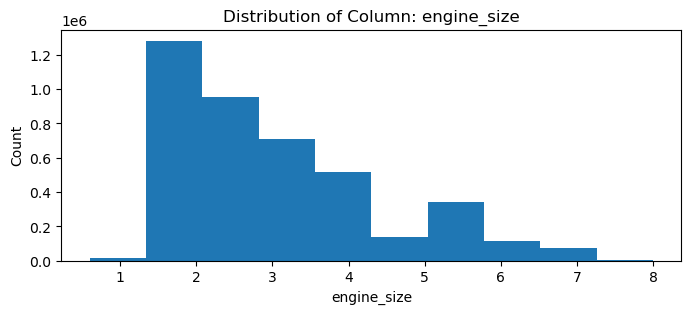

In [222]:
# Set up plot
plt.figure(figsize=(8,3))

# Plot Distribution
plt.hist(encoded_df[encoded_df["engine_size"]<=8]["engine_size"],bins= 10)

# Title and Axis
plt.title(f"Distribution of Column: engine_size")
plt.ylabel("Count")
plt.xlabel("engine_size")

# Show plot
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- Both `miles` and `engine_size` are right-skewed and tend to have a smaller value.
    
<div>

#### Bar Plot for `fuel_type`

In [223]:
fuel_tpye_col = ['fuel_CompressedNaturalGas', 'fuel_Biodiesel', 'fuel_E85',
       'fuel_Electric', 'fuel_Hydrogen', 'fuel_Lpg', 'fuel_PremiumUnleaded',
       'fuel_M85', 'fuel_Diesel', 'fuel_Unleaded']


In [224]:
fuel_col_count = encoded_df[fuel_tpye_col].sum(axis = 0).sort_values()
fuel_col_count

fuel_M85                           2
fuel_Lpg                           7
fuel_Hydrogen                    177
fuel_CompressedNaturalGas        291
fuel_Biodiesel                   518
fuel_Diesel                   103808
fuel_Electric                 110921
fuel_E85                      342179
fuel_PremiumUnleaded          906784
fuel_Unleaded                3116481
dtype: int64

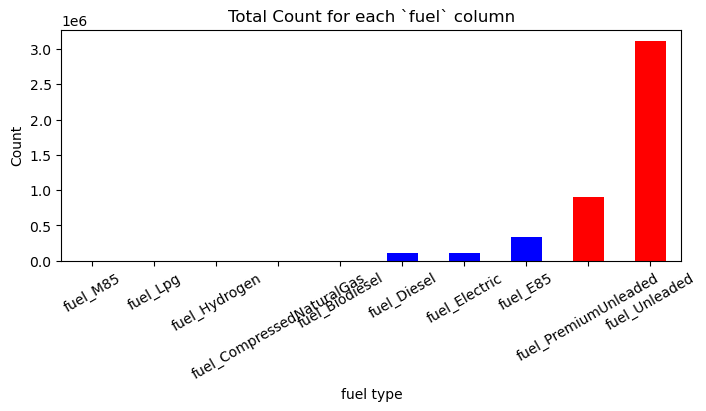

In [225]:
# Set up plot
plt.figure(figsize=(8,3))

# Plot
colors = ["blue" if i < len(fuel_col_count)-2 else "red" for i in range(len(fuel_col_count))]
fuel_col_count.plot(kind="bar",color = colors)

# Title and Axis
plt.title(f"Total Count for each `fuel` column")
plt.ylabel("Count")
plt.xlabel("fuel type")
plt.xticks(rotation = 30)

# Show plot
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- For one vehicle, it can be supported by different types of fuels, which means there could have more than one 1's in the same row in these columns.
- For the first five columns on the left, they are so few that not even shown in the bar plot. 
- For columns `M85` and `Lpg`, they have less than 10 occurrence. There will be many 0's in these columns, which may result in high correlation with each other. We may need to handle them properly before model fitting.
- The most popular fuel type are `Unleaded` and `PremiumUnleaded` (red bar).
    
<div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-cat-uni">
    <h3> Univariate Analysis - Categorical </h3>
</a>
</div>

#### Columns with too many distinct dalues

In [226]:
discrete_cols = ['make', 'model', 'trim', 'body_type',
                 'vehicle_type', 'drivetrain', 'transmission',
                 'engine_block', 'city', 'state']
for dis_col in discrete_cols:
    distinct_val = set(encoded_df[dis_col])
    if len(distinct_val) > 50:
        print(f"Column: {dis_col} has {len(distinct_val)} distinct values")

Column: make has 63 distinct values
Column: model has 1252 distinct values
Column: trim has 2492 distinct values
Column: city has 6095 distinct values
Column: state has 68 distinct values


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- During the feature engineering stage, we will handle these categorical data with different encoding methods.
- In the following plots, we will only plot the top 100 values for these columns.
    
<div>

#### Barplot for Columns with over 50 distinct values


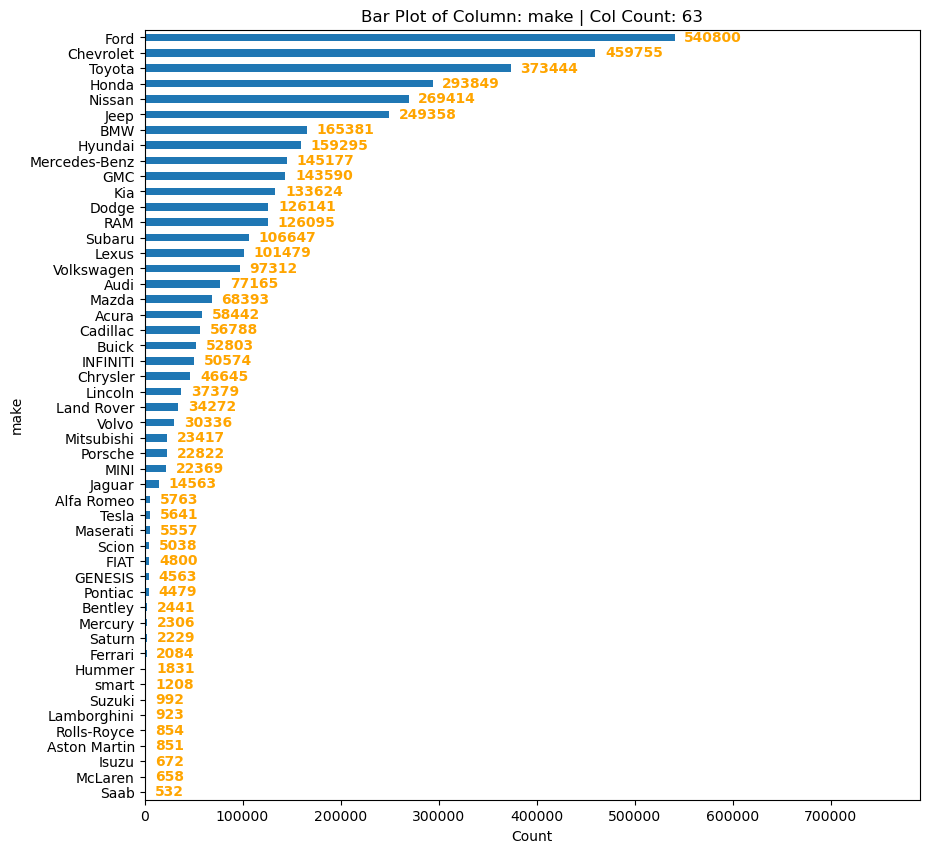

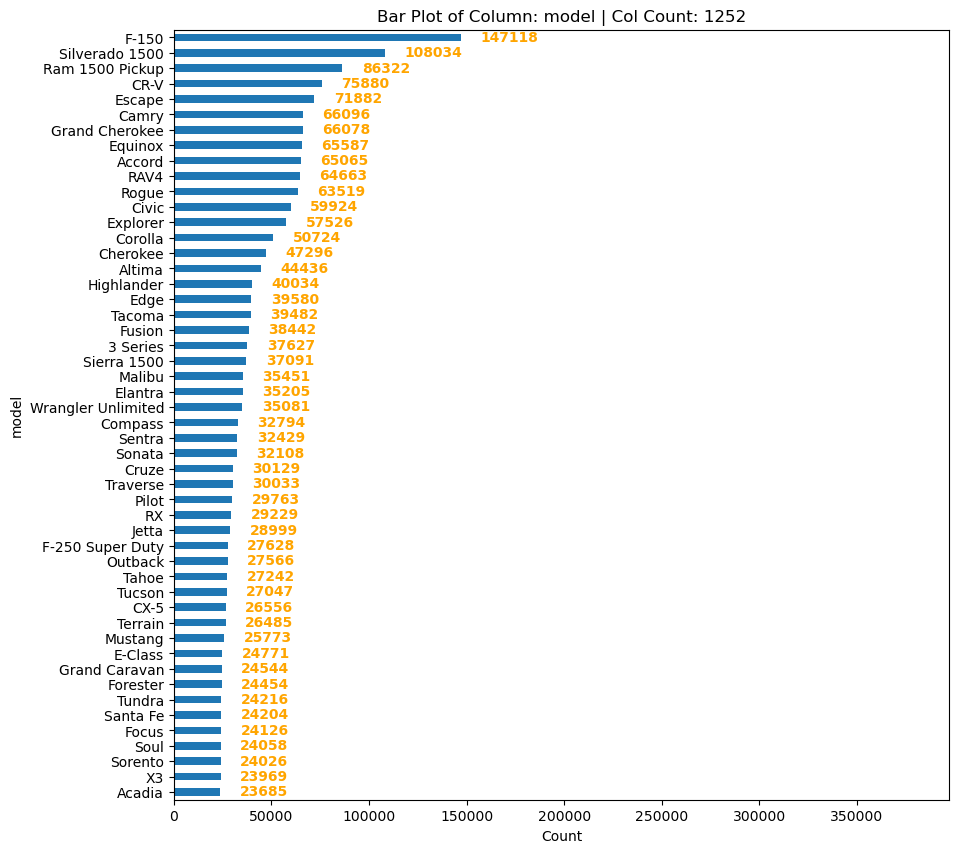

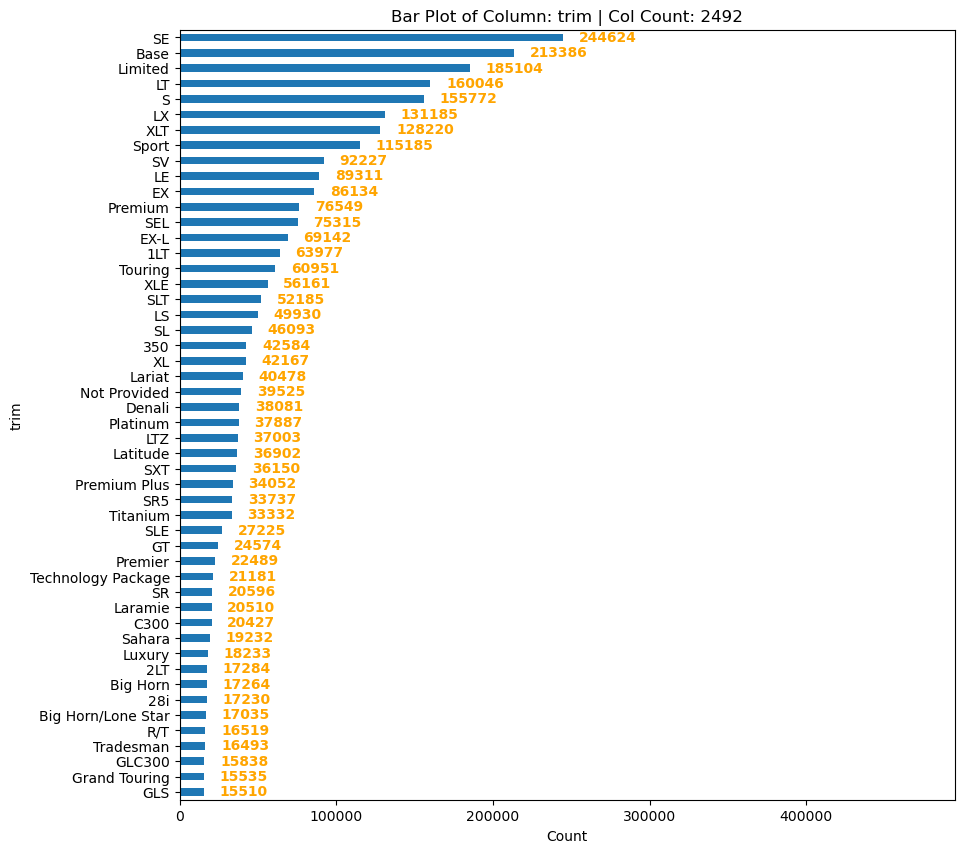

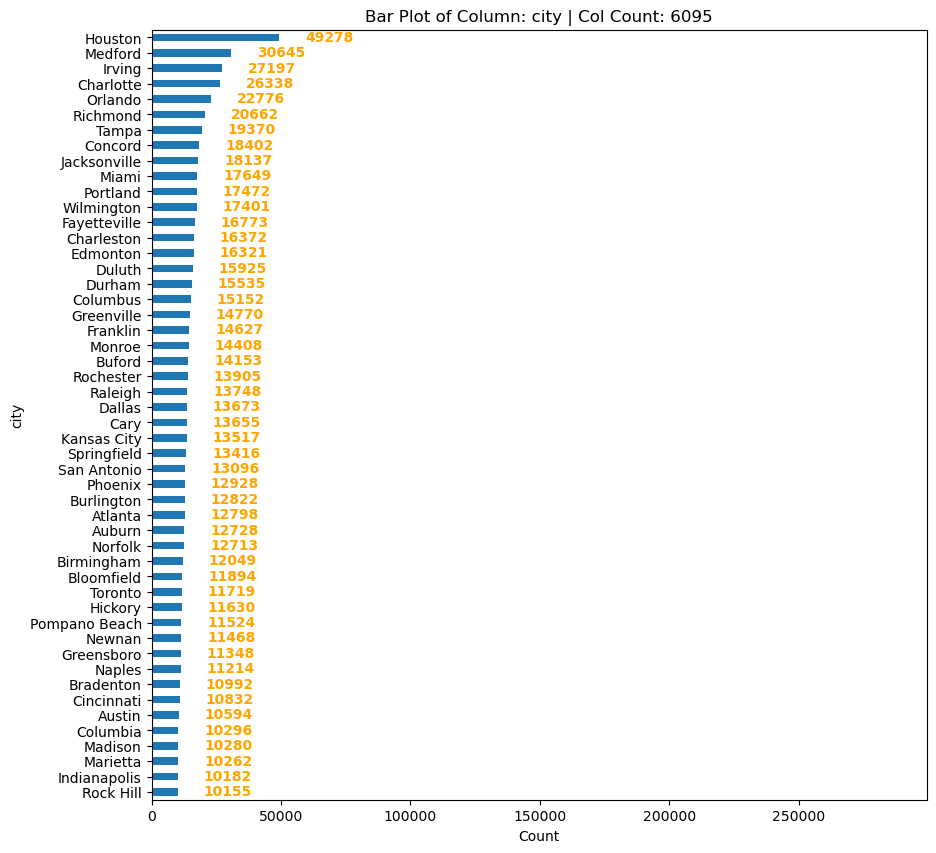

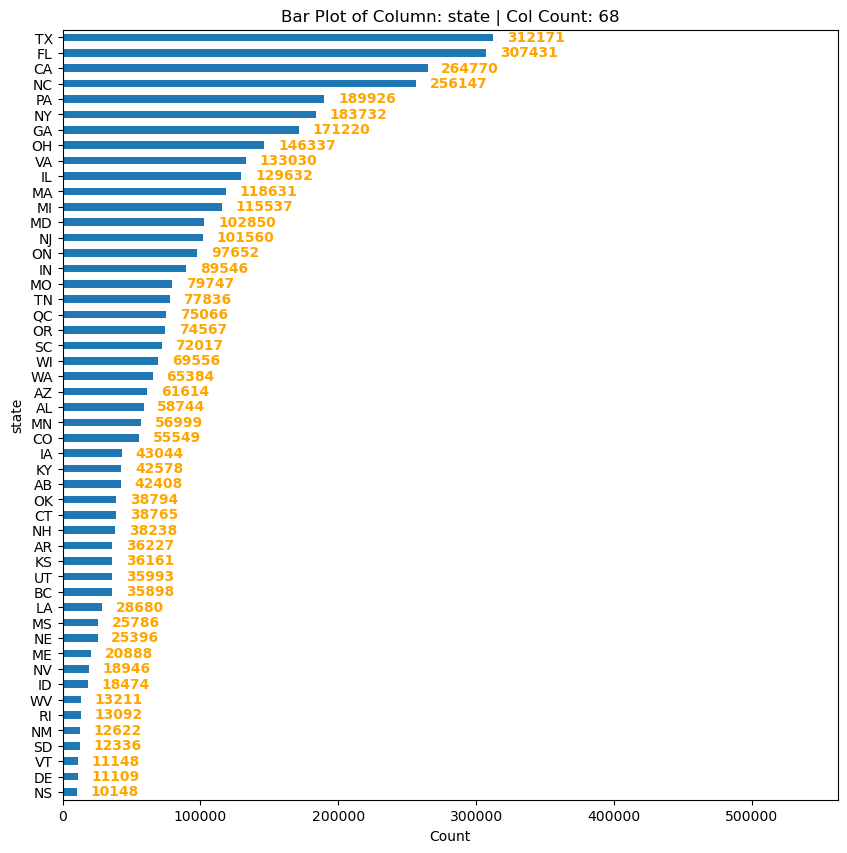

In [227]:
discrete_too_many_cols = ['make','model', 'trim', 'city','state',]
for dis_col in discrete_too_many_cols:
    # Set up plot
    plt.figure(figsize=(10,10))

    # Plot
    max_bar_count = 50
    val_count = encoded_df[dis_col].value_counts().sort_values(ascending = False)
    count = len(val_count.index)
    ax = val_count[:max_bar_count].plot(kind = "barh")
        
    # Show values
    for k, v in enumerate(val_count[:max_bar_count].values):
        ax.text(v + 1e4, k + 0.25, str(v), color='orange', fontweight='bold')

    # Title and Axis
    plt.title(f"Bar Plot of Column: {dis_col} | Col Count: {count}")
    plt.xlabel("Count")
    plt.ylabel(dis_col)
    plt.xlim([0,val_count.max()+2.5e5])
    
    # Show value in descending order
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- For these all 5 columns above, the top 100 categories has recognizable amount of data, which is good for the model to extract the information.
- However, the overwhelming amount of distinct values in these columns may expand our **feature space** drastically.
- For `make` and `state` there are less than 100 categories. We may still apply **dummy encoding** on it.
- However, for other columns, they have over 1000 or even 10000 distinct value. It may not possible to apply dummy encoding on it.  
We may need to further **group** them or apply other types of **encoding methods**. 

Let's move to other categorical columns.
    
<div>

#### Barplot for Columns with less then 50 distinct values

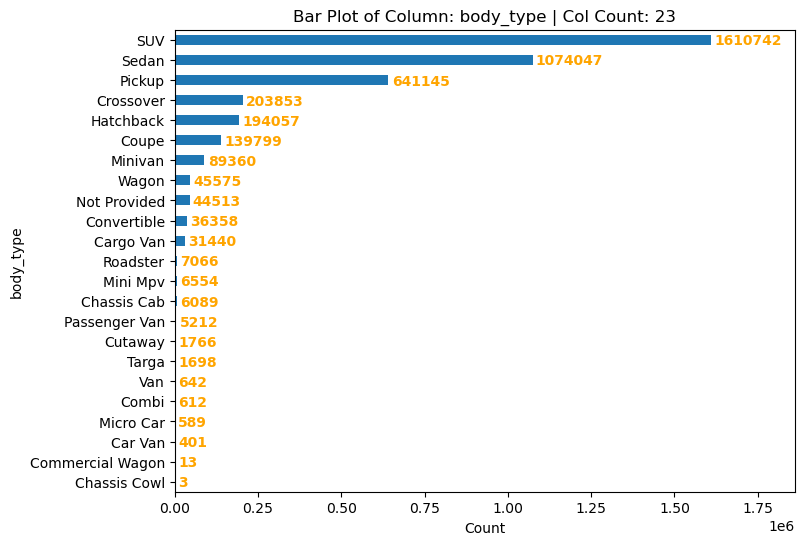

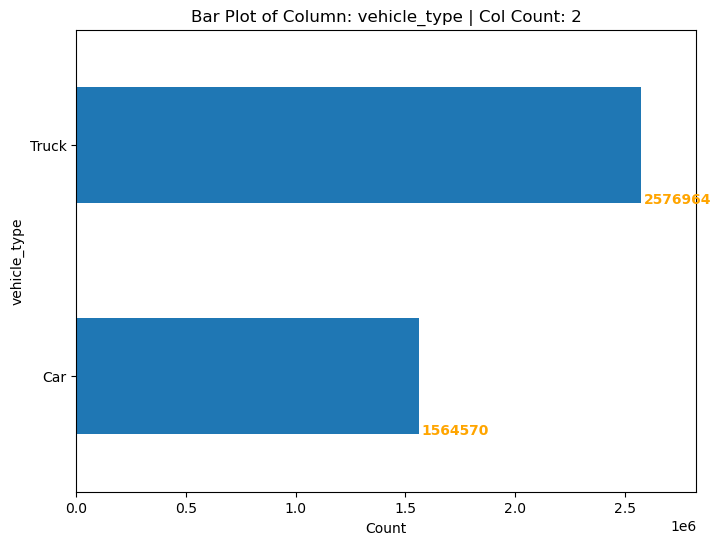

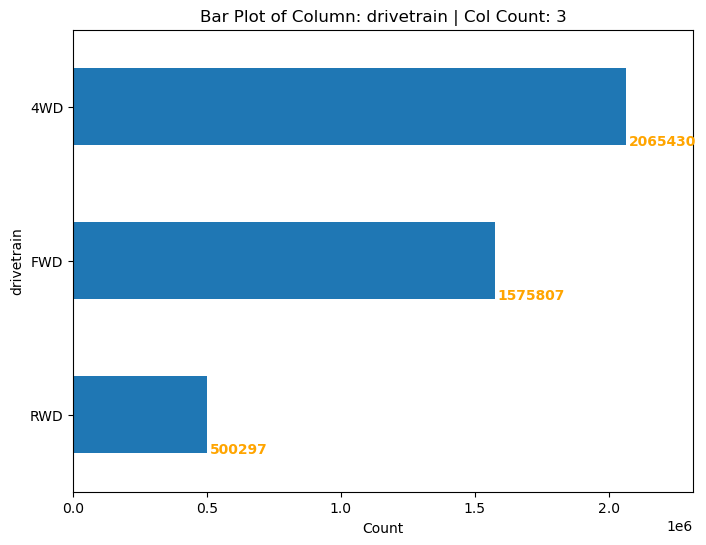

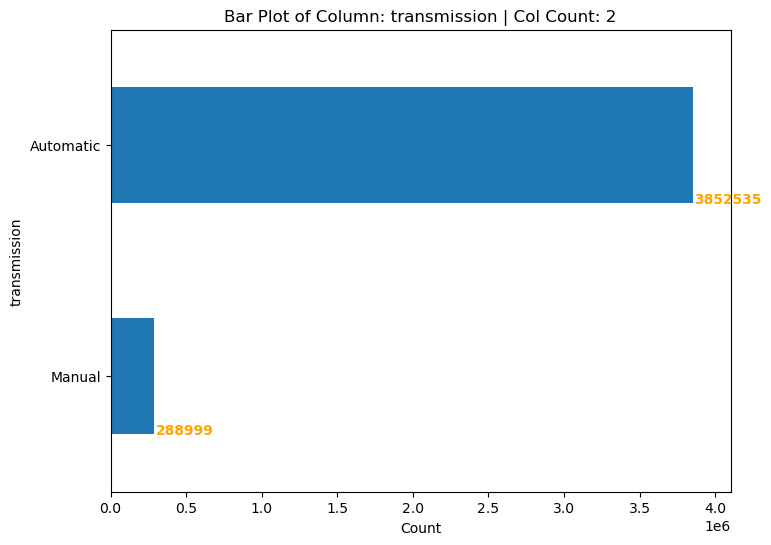

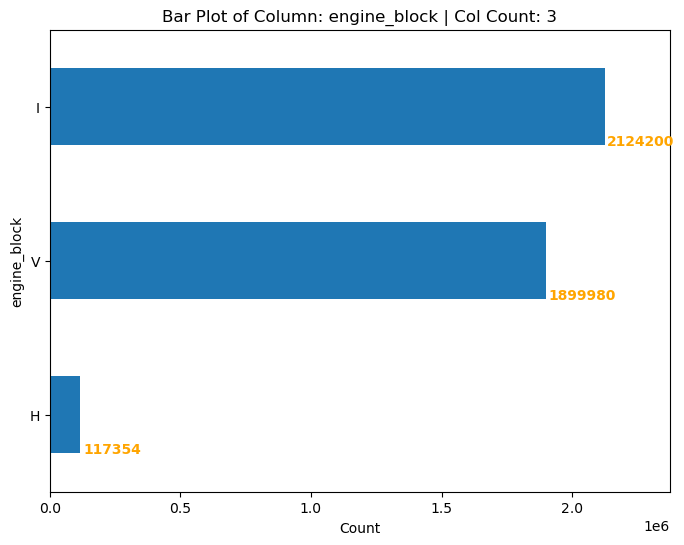

In [228]:
discrete_normal_cols = ['body_type', 'vehicle_type', 'drivetrain', 'transmission','engine_block']
for dis_col in discrete_normal_cols:
    # Set up plot
    plt.figure(figsize=(8,6))

    # Plot
    max_bar_count = 100
    val_count = encoded_df[dis_col].value_counts().sort_values(ascending = False)
    count = len(val_count.index)
    ax = val_count.sort_values(ascending = False).plot(kind = "barh",width = 0.5)
        
    # Show values
    for k, v in enumerate(val_count.values):
        ax.text(v + 1e4, k + 0.25, str(v), color='orange', fontweight='bold')

    # Title and Axis
    plt.title(f"Bar Plot of Column: {dis_col} | Col Count: {count}")
    plt.xlabel("Count")
    plt.ylabel(dis_col)
    plt.xlim([0,val_count.max()+2.5e5])
    
    # Show value in descending order
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- For `body` column, we can see that there is a sharp cut between the value `Cargo Van` and `Roadster`. Perhaps this could be the cut off for dummy encoding.
- For `vehicle type` column, it is interesting that there are more `truck` vehicle type than `car` vehicle type. Maybe people in North America prefer to have a `truck` rather than a `car` for a larger loading capacity.
- For `drivetrain` column, we can see a comparable difference between all 3 types of drivetrain, but it is fine for our prediction.
- For `transmission` column, we can see that there are a lot of `automatic` transmission vehicle than `manual`.
- For `engine_block` column, we can see that most of the `engine_block` type are `I` or `V`. Maybe it is related to the vehicle `model` or the manufacturer (`make`). We may explore more in the bivariate analysis below.
    
<div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-num-bi">
    <h3> Bivariate Analysis - Numerical </h3>
</a>
</div>

#### What numerical columns do we have?

In [229]:
target_var = "price_range"

In [230]:
# Get all columns with int or float type
all_num_col = list(encoded_df.select_dtypes(["int64","float64"]).columns)
all_num_col.remove(target_var)
all_num_col

['miles',
 'year',
 'engine_size',
 'log_miles',
 'fuel_Electric',
 'fuel_CompressedNaturalGas',
 'fuel_Lpg',
 'fuel_PremiumUnleaded',
 'fuel_E85',
 'fuel_Diesel',
 'fuel_Unleaded',
 'fuel_M85',
 'fuel_Hydrogen',
 'fuel_Biodiesel']

In [231]:
# Split the column that generate from the fuel_type column
fuel_col = all_num_col[4:]
fuel_col

['fuel_Electric',
 'fuel_CompressedNaturalGas',
 'fuel_Lpg',
 'fuel_PremiumUnleaded',
 'fuel_E85',
 'fuel_Diesel',
 'fuel_Unleaded',
 'fuel_M85',
 'fuel_Hydrogen',
 'fuel_Biodiesel']

In [232]:
num_col = all_num_col[:3]
num_col

['miles', 'year', 'engine_size']

#### `miles` vs `price_range`

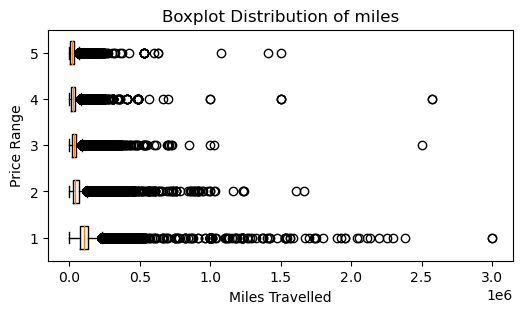

In [233]:
plt.figure(figsize = (6,3))
for p in set(encoded_df[target_var]):
    sub_df = encoded_df[encoded_df[target_var] == p][["miles",target_var]]
    plt.boxplot(x = sub_df["miles"],vert = False,positions = [p],widths = 0.5)
    
# Title & Axis
plt.title("Boxplot Distribution of miles")
plt.ylabel("Price Range")
plt.xlabel("Miles Travelled")

# Show
plt.show()

It seems that the data follows log-normal distribution. Let's try apply log scale on x-axis.

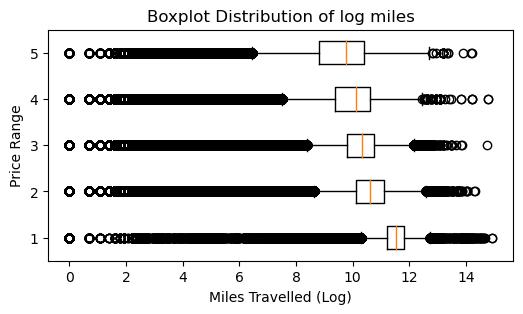

In [234]:
plt.figure(figsize = (6,3))
for p in set(encoded_df[target_var]):
    sub_df = encoded_df[encoded_df[target_var] == p][["miles",target_var]]
    plt.boxplot(x = sub_df["miles"].apply(np.log),vert = False,positions = [p],widths = 0.5)
    
# Title & Axis
plt.title("Boxplot Distribution of log miles")
plt.ylabel("Price Range")
plt.xlabel("Miles Travelled (Log)")

# Show
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- Note that Log transformation is applied on the x-axis (`miles`). Maybe we can apply log transformation during the feature enginering stage.
- From the boxplot above, we can see that the more `miles` a car has, the lower price range it would be.
- It would be very useful for predicting the price range.
    
<font size="4px" color="#ffa600"><b>👀 Further Analysis Opportunity:</b></font>
    
- ANOVA test on the average log miles travelled of each group
    
<div>

#### `year` vs `price_range`

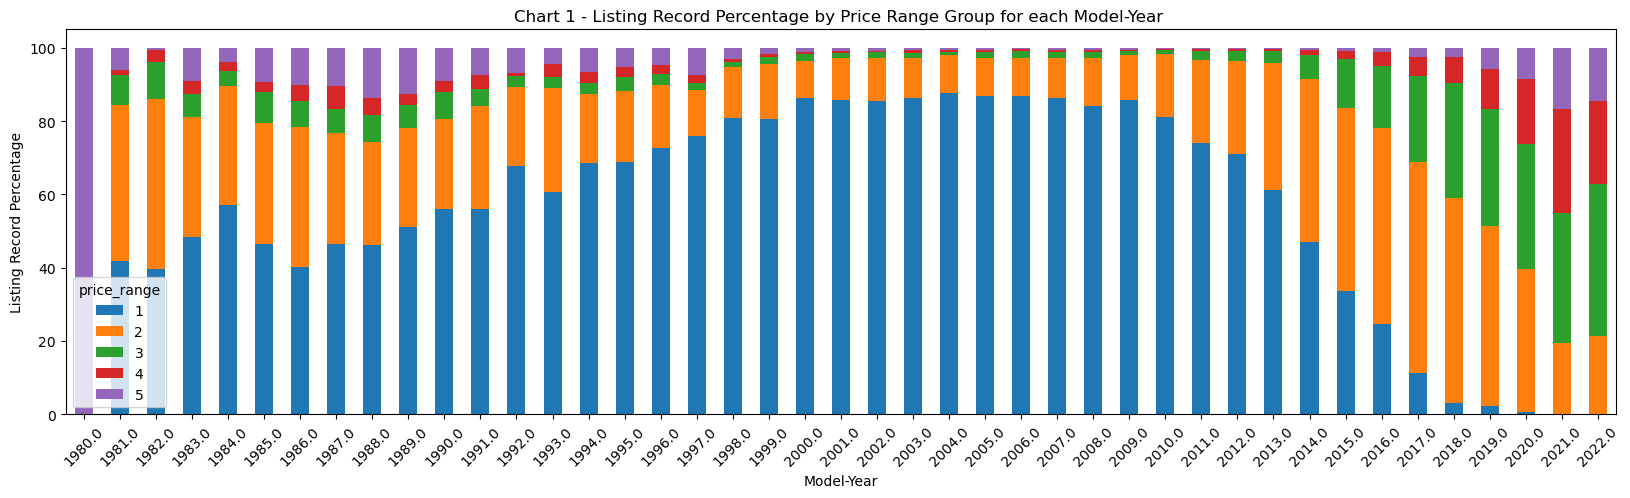

In [235]:

d = encoded_df.groupby('year')[target_var].value_counts(normalize=True).apply(lambda p: p*100).unstack(target_var)
d.plot(kind = "bar",stacked=True,figsize = (20,5))

    
# Title & Axis
plt.title("Chart 1 - Listing Record Percentage by Price Range Group for each Model-Year ")
plt.ylabel("Listing Record Percentage")
plt.xlabel("Model-Year")
plt.xticks(rotation = 45)


# Show
plt.legend(title=target_var)
plt.show()

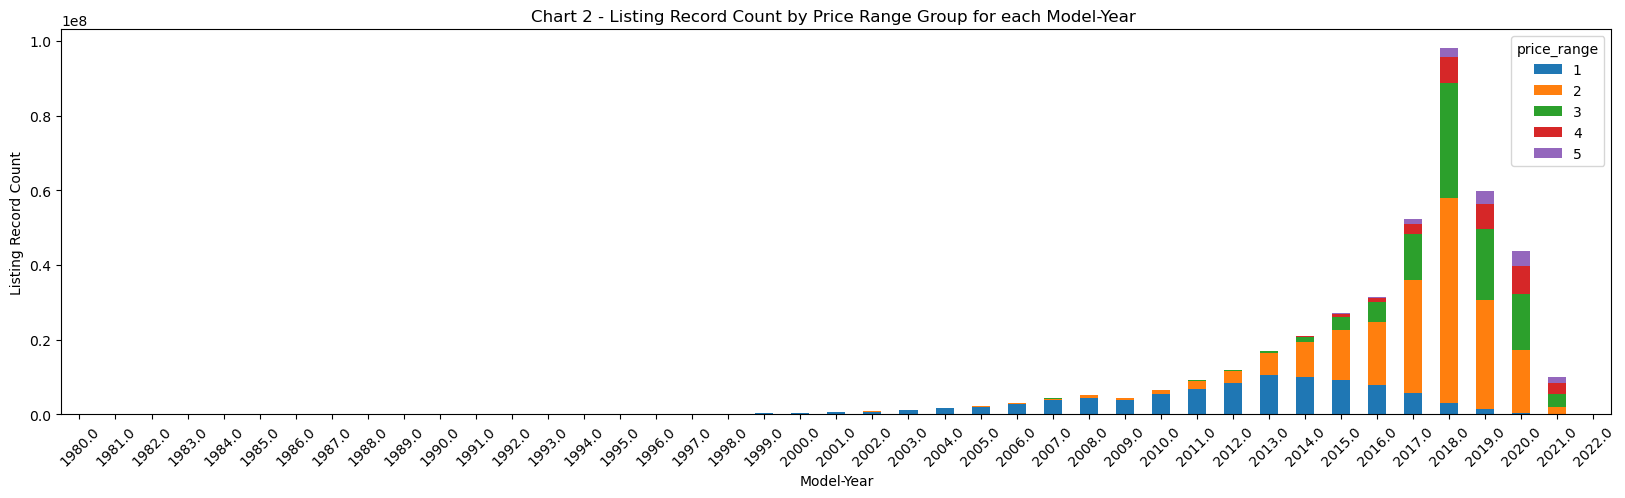

In [236]:
d = encoded_df.groupby('year')[target_var].value_counts(normalize=False).apply(lambda p: p*100).unstack(target_var)
d.plot(kind = "bar",stacked=True,figsize = (20,5))

# Title & Axis
plt.title("Chart 2 - Listing Record Count by Price Range Group for each Model-Year ")
plt.ylabel("Listing Record Count")
plt.xlabel("Model-Year")
plt.xticks(rotation = 45)

# Show
plt.legend(title=target_var)
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- We can see that the Vehicle Model launched in recently year usually have higher price (Increase in market share in group 3,4,5). It may caused by inflation.
- In 1980, there are 100% of listing vehicle with price range of 5. This may be caused by the lack of listing of old vehicle model. These listings could also be the famous model which could be antique.
- The possible reasons for the pattern in chart above:
    1. Inflation could be one of the reasons why the percentage of listing with group 1 and group 2 are vanishing in the last few years. Price for a used car keep rising in the last few years.
    2. Vehicle with model year before 2000 could be so few that induced some weird patterns in Chart 1.
    
<div>

#### `engine_size` vs `price_range`

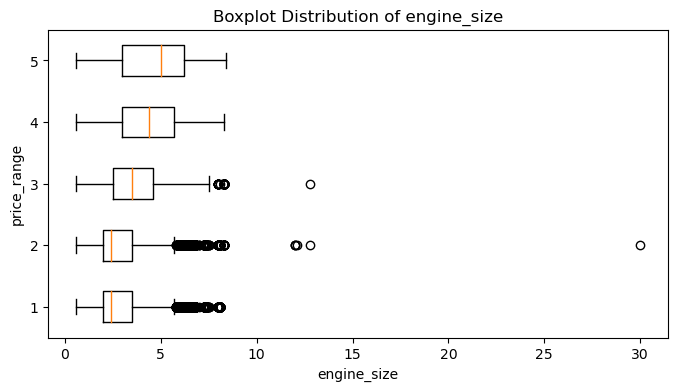

In [237]:
plt.figure(figsize = (8,4))
for p in set(encoded_df[target_var]):
    sub_df = encoded_df[encoded_df[target_var] == p][["engine_size",target_var]]
    plt.boxplot(x = sub_df["engine_size"],vert = False,positions = [p],widths = 0.5)
    
# Title & Axis
plt.title("Boxplot Distribution of engine_size")
plt.ylabel(target_var)
plt.xlabel("engine_size")

# Show
plt.show()

It seems that there is an outlier on the right that affect the plot. Lets set the x-axis range to [0,15]

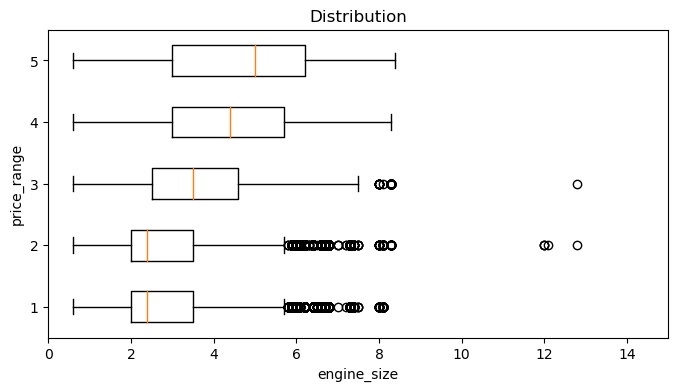

In [238]:
plt.figure(figsize = (8,4))
for p in set(encoded_df[target_var]):
    sub_df = encoded_df[encoded_df[target_var] == p][["engine_size",target_var]]
    plt.boxplot(x = sub_df["engine_size"],vert = False,positions = [p],widths = 0.5)
    
# Title & Axis
plt.title("Distribution")
plt.ylabel(target_var)
plt.xlabel("engine_size")
plt.xlim([0,15])

# Show
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- We can see that the for price range group 1 & 2 & 3, they are very similar. 
- However, for group 4 & 5, they have comparably larger engine_size than group 1 & 2 & 3.
    
<font size="4px" color="#ffa600"><b>👀 Further Analysis Opportunity:</b></font>
    
- ANOVA test on the average engine_size of each group
    
<div>

#### `fuel_type` enconded columns vs `price_range`

In [239]:
fuel_col

['fuel_Electric',
 'fuel_CompressedNaturalGas',
 'fuel_Lpg',
 'fuel_PremiumUnleaded',
 'fuel_E85',
 'fuel_Diesel',
 'fuel_Unleaded',
 'fuel_M85',
 'fuel_Hydrogen',
 'fuel_Biodiesel']

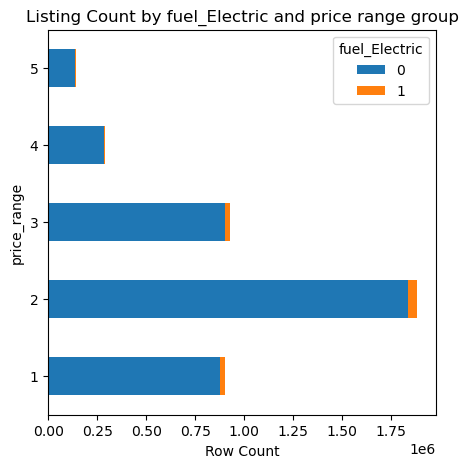

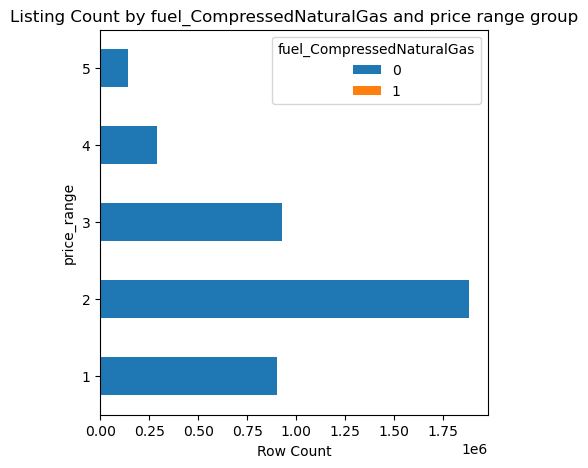

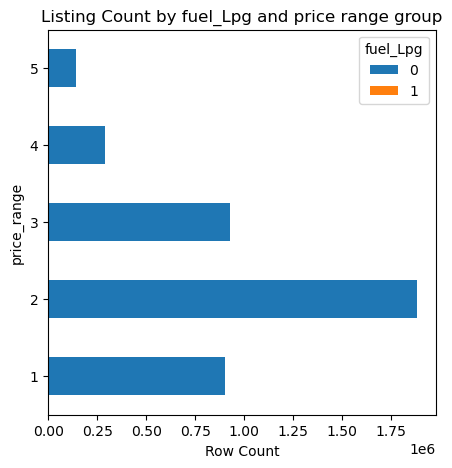

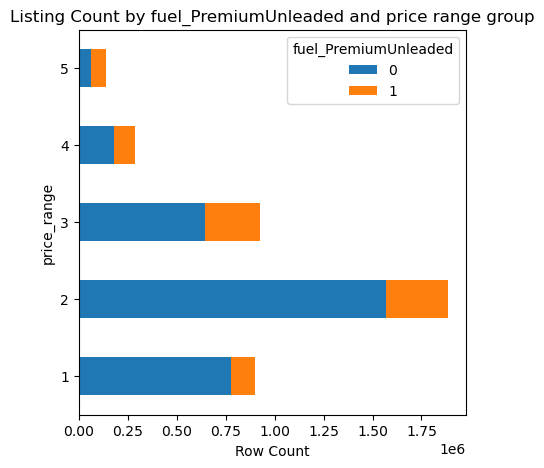

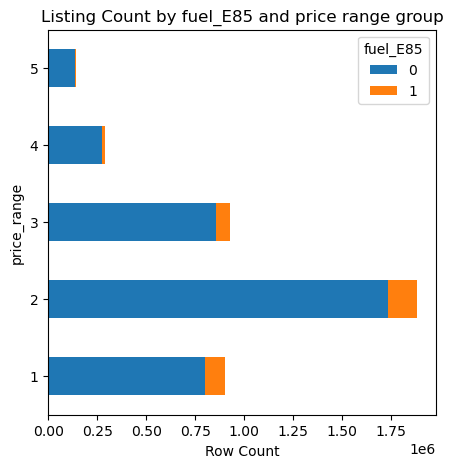

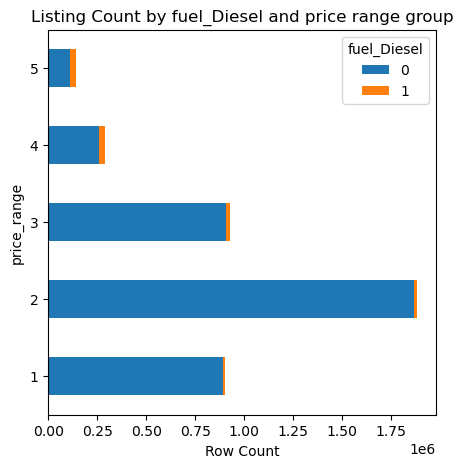

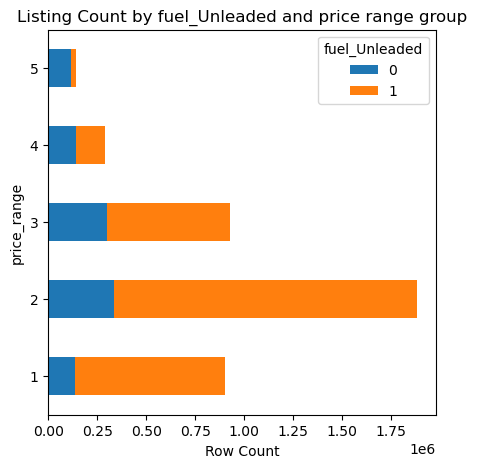

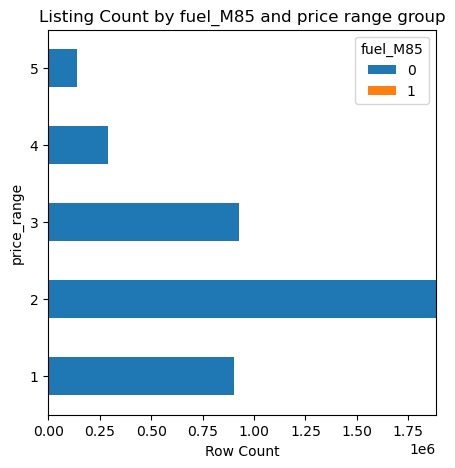

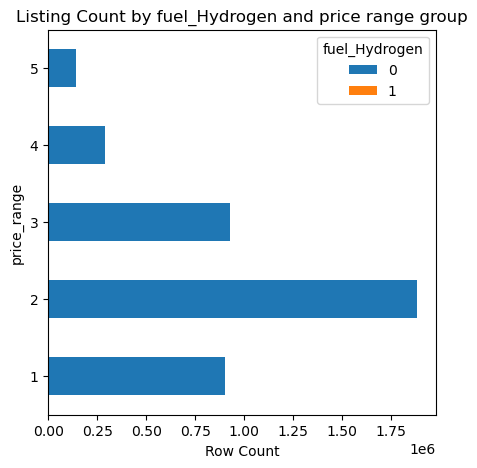

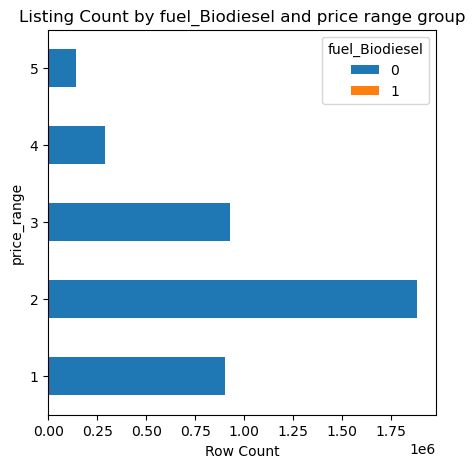

In [240]:
for fuel in fuel_col:
    encoded_df[[fuel,target_var]].value_counts().unstack().T.plot(kind="barh",stacked = True,figsize = (5,5))
    plt.ylabel(target_var)
    plt.xlabel("Row Count")
    plt.title(f"Listing Count by {fuel} and price range group")
    plt.show()

In [241]:
encoded_df[fuel_col].sum().sort_values(ascending = False)

fuel_Unleaded                3116481
fuel_PremiumUnleaded          906784
fuel_E85                      342179
fuel_Electric                 110921
fuel_Diesel                   103808
fuel_Biodiesel                   518
fuel_CompressedNaturalGas        291
fuel_Hydrogen                    177
fuel_Lpg                           7
fuel_M85                           2
dtype: int64

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- For fuel type `Biodiesel`, `M85`, `Lpg`, `CompressedNaturalGas` and `Hydrogen`, most of the vehicle listing are not supporting these fuel type.
- Vehicles in most of the listing support `PremiumUnleaded` or `Unleaded`.
    
<font size="4px" color="#ffa600"><b>👀 Further Analysis Opportunity:</b></font>
    
- Chi-Squared Independency Test betweek each fuel_type enconded column and `price_range`    
<div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="2-cat-bi">
    <h3> Bivariate Analysis - Categorical </h3>
</a>
</div>

#### What Categorical columns do we have?

In [242]:
target_var = "price_range"

In [243]:
# Get all columns with int or float type
all_cat_col = list(encoded_df.select_dtypes(["object"]).columns)

# vin is the unique identifier for each vehicle
all_cat_col.remove("vin")

all_cat_col

['make',
 'model',
 'trim',
 'body_type',
 'vehicle_type',
 'drivetrain',
 'transmission',
 'engine_block',
 'city',
 'state']

In [244]:
# Number of unique value in these categorical columns
encoded_df[all_cat_col].nunique()

make              63
model           1252
trim            2492
body_type         23
vehicle_type       2
drivetrain         3
transmission       2
engine_block       3
city            6095
state             68
dtype: int64

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- For columns with large number of unique values (> 20), we will skip the plotting here.
    
<div>

#### Categorical columns vs `price_range`

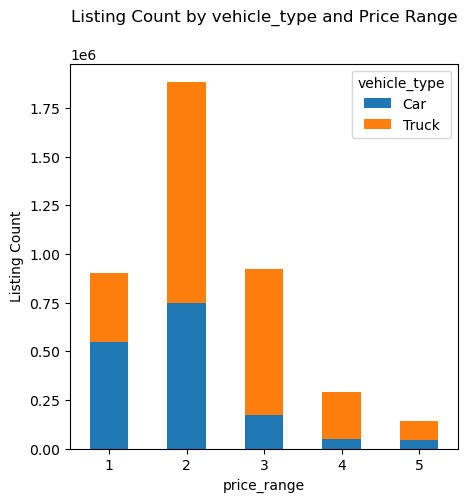

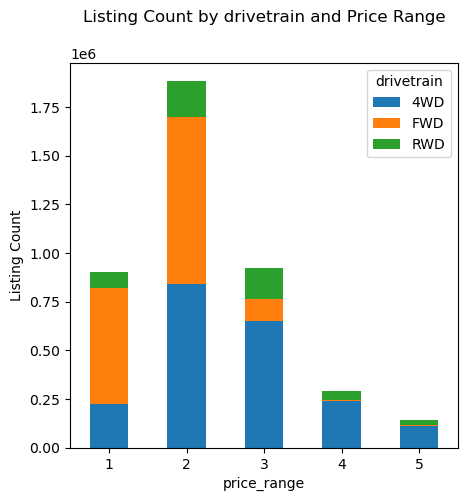

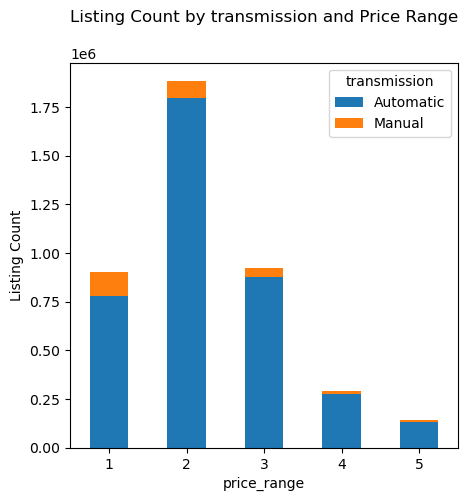

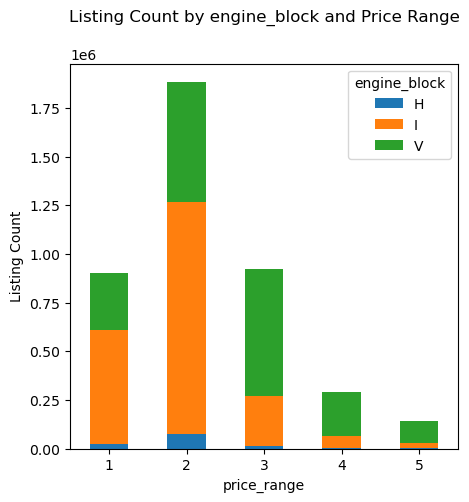

In [245]:
for col in ["vehicle_type","drivetrain","transmission","engine_block"]:
    d = encoded_df.groupby(target_var)[col].value_counts().unstack(col)
    d.plot(kind = "bar",stacked=True,figsize = (5,5))

    # Title & Axis
    plt.title(f"Listing Count by {col} and Price Range\n")
    plt.ylabel("Listing Count")
    plt.xlabel(target_var)
    plt.xticks(rotation = 0)

    # Show
    plt.legend(title=col)
    plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- In `drivetrain` vs `price_range`, vehicle in price range group 4 & 5 usually is not `FWD` drivetrain type.
- In `transmission` vs `price_range`, almost over 90% of vehicle in **each** price range are with `automatic` transmission.
- In `engine_block` vs `price_range`, vehicle in price range group 4 & 5 usually is not `H` engine_block type.
    
<font size="4px" color="#ffa600"><b>👀 Further Analysis Opportunity:</b></font>
    
- Chi-Squared Independent Test for above four pairs
    
<div>

### Conclusion - EDA

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>📊 EDA Summary:</b></font>

- From all the analysis above, we spot out some insights from the data, as well as some opportunity for further analysis. We will go through these further analysis below in the section of [Statistical Analysis](#2-stat-ana).
    

<div>

[Back-to-top](#2-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
    
<a class="anchor" id="2-stat-ana">
    <h2> Statistical Analysis </h2>
</a>

<b>Table of Contents for this part: </b>
<ul>    
    <li> ANOVA test on the average log <b><i>miles</i></b> travelled of each groupANOVA test on the average log <b><i>miles</i></b> travelled of each group </li>
    <li> ANOVA test on the average <b><i>engine_siz</i></b> of each group </li>
    <li> Chi-Squared Independency Test between each fuel_type enconded column (columns starting with <b><i>fuel_</i></b>) and <b><i>price_range</i></b> </li>
    <li> Chi-Squared Independency Test between [<b><i>vehicle_type</i></b>, <b><i>drivetrain</i></b>, <b><i>transmission</i></b> & <b><i>engine_block</i></b>] and <b><i>price_range</i></b> </li>
</ul>
    
</div>


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="">
    <h3> ANOVA test - log <b><i>miles</i></b> vs <b><i>price_range</i></b> </h3>
</a>
</div>

#### Extracting required data

In [246]:
# Get only the required columns to avoid editing original dataframe
temp_df = encoded_df[["miles","price_range","log_miles"]]
temp_df.head()

,miles,price_range,log_miles
0,9966.0,5,9.207035
1,5988.0,5,8.697680
2,24242.0,5,10.095883
3,6637.0,5,8.800566
4,18281.0,5,9.813672


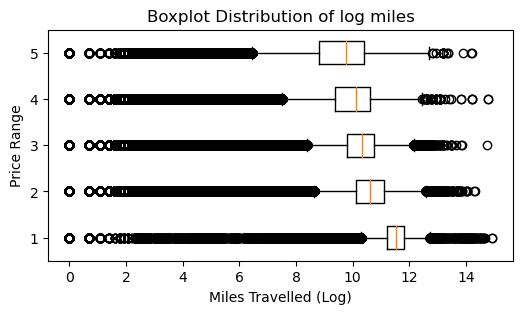

In [247]:
plt.figure(figsize = (6,3))
for p in set(temp_df["price_range"]):
    sub_df = temp_df[temp_df["price_range"] == p]
    plt.boxplot(x = sub_df["log_miles"],vert = False,positions = [p],widths = 0.5)
    
# Title & Axis
plt.title("Boxplot Distribution of log miles")
plt.ylabel("Price Range")
plt.xlabel("Miles Travelled (Log)")

# Show
plt.show()

#### ANOVA Assumption Checking

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">

- [x] Observation Independency: 
    - We assumption all our listing record are independent. So it is checked.
- [x] Sample Mean should be the normally distirbuted (By Central Limit Theorem)
    - We have large sample. So it is checked by CLT.
- [ ] Variance for each group should be equal
    - Let's check it 
    
<div>

In [248]:
for i in sorted(temp_df["price_range"].unique()):
    abc = temp_df[temp_df["price_range"]==i]["log_miles"].values
    print(f"Group {i}: {np.var(abc)} | Data Point: {len(abc)}")

Group 1: 0.8541298616485521 | Data Point: 901476
Group 2: 1.1527761791721887 | Data Point: 1883263
Group 3: 1.7322405182180043 | Data Point: 924857
Group 4: 2.9802824605666425 | Data Point: 290521
Group 5: 3.455111172663339 | Data Point: 141417


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- We can see that the variances for each group are not the same. After doing some research, we know that although ANOVA is robust to ignore the unequal variance between groups, it requires to have same/similar sample size for each group.

- However, our target vaariables are with imbalanced record count. With our data, we cannot use ANOVA. Instead, we can use [`Kruskal–Wallis Test`](#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)
    
<div>

#### Kruskal-Wallis Test (non-parametric version of ANOVA)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">

According to `scipy` library, the description of is `Kruskal–Wallis Test`:  

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

The hypothesis testing of `Kruskal–Wallis Test` are as follow:

$$H_0: The\;population\;median\;of\;all\;groups\;are\;equal $$
$$H_1: The\;population\;median\;of\;some\;groups\;are\;NOT\;equal $$
    
<div>

In [249]:
# Split the 
sample_1 = temp_df.loc[temp_df["price_range"]==1,"log_miles"]
sample_2 = temp_df.loc[temp_df["price_range"]==2,"log_miles"]
sample_3 = temp_df.loc[temp_df["price_range"]==3,"log_miles"]
sample_4 = temp_df.loc[temp_df["price_range"]==4,"log_miles"]
sample_5 = temp_df.loc[temp_df["price_range"]==5,"log_miles"]

In [250]:
# Kruskal Test on all samples
kruskal(sample_1,sample_2,sample_3,sample_4,sample_5)

KruskalResult(statistic=1404129.366688068, pvalue=0.0)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- The p-value is smaller than 0.05, which some of the groups have different medians.
    
<div>

In [251]:
from itertools import combinations

group_pairs = []
p_val_list =[]

for i,j in combinations([1,2,3,4,5],2):
    print(f"Computing Kruskal for `log_miles` Test between Group {i} & Group {j}")
    statistics, p_val = kruskal(temp_df.loc[temp_df["price_range"]==i,"log_miles"],
                               temp_df.loc[temp_df["price_range"]==j,"log_miles"])
    group_pairs.append((i,j))
    p_val_list.append(p_val)
    
pd.DataFrame({"Group Pair":group_pairs,"p_val":p_val_list})

Computing Kruskal for `log_miles` Test between Group 1 & Group 2
Computing Kruskal for `log_miles` Test between Group 1 & Group 3
Computing Kruskal for `log_miles` Test between Group 1 & Group 4
Computing Kruskal for `log_miles` Test between Group 1 & Group 5
Computing Kruskal for `log_miles` Test between Group 2 & Group 3
Computing Kruskal for `log_miles` Test between Group 2 & Group 4
Computing Kruskal for `log_miles` Test between Group 2 & Group 5
Computing Kruskal for `log_miles` Test between Group 3 & Group 4
Computing Kruskal for `log_miles` Test between Group 3 & Group 5
Computing Kruskal for `log_miles` Test between Group 4 & Group 5


,Group Pair,p_val
0,"(1, 2)",0.0
1,"(1, 3)",0.0
2,"(1, 4)",0.0
3,"(1, 5)",0.0
4,"(2, 3)",0.0
5,"(2, 4)",0.0
6,"(2, 5)",0.0
7,"(3, 4)",0.0
8,"(3, 5)",0.0
9,"(4, 5)",0.0


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- According to the above test result, all pairs of group have p-value smaller than 0.05, which means none of the group pairs have the same median. 
- Therefore log `miles` is different in each price range group, which matches the boxplot graph above.
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="">
    <h3> ANOVA test - <b><i>engine_size</i></b> vs <b><i>price_range</i></b> </h3>
</a>
</div>

#### Extracting required data

In [252]:
# Get only the required columns to avoid editing original dataframe
temp_df = encoded_df[["engine_size","price_range"]]
temp_df.head()

,engine_size,price_range
0,3.5,5
1,3.5,5
2,3.5,5
3,3.5,5
4,3.5,5


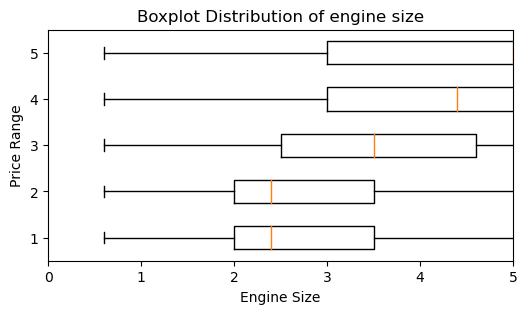

In [253]:
plt.figure(figsize = (6,3))
for p in set(temp_df["price_range"]):
    sub_df = temp_df[temp_df["price_range"] == p]
    plt.boxplot(x = sub_df["engine_size"],vert = False,positions = [p],widths = 0.5)
    
# Title & Axis
plt.title("Boxplot Distribution of engine size")
plt.ylabel("Price Range")
plt.xlabel("Engine Size")

# Show
plt.xlim([0,5])
plt.show()

#### ANOVA Assumption Checking

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">

- [x] Observation Independency: 
    - We assumption all our listing record are independent. So it is checked.
- [x] Sample Mean should be the normally distirbuted (By Central Limit Theorem)
    - We have large sample. So it is checked by CLT.
- [ ] Variance for each group should be equal
    - Let's check it 
    
<div>

In [254]:
for i in sorted(temp_df["price_range"].unique()):
    abc = temp_df[temp_df["price_range"]==i]["engine_size"].values
    print(f"Group {i}: {np.var(abc)} | Data Point: {len(abc)}")

Group 1: 1.0178495372558585 | Data Point: 901476
Group 2: 1.115162631955611 | Data Point: 1883263
Group 3: 1.693999399064951 | Data Point: 924857
Group 4: 2.4710096086129627 | Data Point: 290521
Group 5: 2.510696938065753 | Data Point: 141417


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- Similar to above case, we can see that the variances for each group are not the same. We may apply `Kruskal-Wallis Test` in here too.
    
<div>

#### Kruskal-Wallis Test (non-parametric version of ANOVA)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">

The hypothesis testing of `Kruskal–Wallis Test` are as follow:

$$H_0: The\;population\;median\;of\;all\;groups\;are\;equal $$
$$H_1: The\;population\;median\;of\;some\;groups\;are\;NOT\;equal $$
    
<div>

In [255]:
# Split the 
sample_1 = temp_df.loc[temp_df["price_range"]==1,"engine_size"]
sample_2 = temp_df.loc[temp_df["price_range"]==2,"engine_size"]
sample_3 = temp_df.loc[temp_df["price_range"]==3,"engine_size"]
sample_4 = temp_df.loc[temp_df["price_range"]==4,"engine_size"]
sample_5 = temp_df.loc[temp_df["price_range"]==5,"engine_size"]

In [256]:
# Kruskal Test on all samples
kruskal(sample_1,sample_2,sample_3,sample_4,sample_5)

KruskalResult(statistic=729434.8426010535, pvalue=0.0)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- The p-value is smaller than 0.05, which some of the groups have different medians.
    
<div>

In [257]:
from itertools import combinations

group_pairs = []
p_val_list =[]

for i,j in combinations([1,2,3,4,5],2):
    print(f"Computing Kruskal Test for `engine_size` between Group {i} & Group {j}")
    statistics, p_val = kruskal(temp_df.loc[temp_df["price_range"]==i,"engine_size"],
                               temp_df.loc[temp_df["price_range"]==j,"engine_size"])
    group_pairs.append((i,j))
    p_val_list.append(p_val)
    
pd.DataFrame({"Group Pair":group_pairs,"p_val":p_val_list})

Computing Kruskal Test for `engine_size` between Group 1 & Group 2
Computing Kruskal Test for `engine_size` between Group 1 & Group 3
Computing Kruskal Test for `engine_size` between Group 1 & Group 4
Computing Kruskal Test for `engine_size` between Group 1 & Group 5
Computing Kruskal Test for `engine_size` between Group 2 & Group 3
Computing Kruskal Test for `engine_size` between Group 2 & Group 4
Computing Kruskal Test for `engine_size` between Group 2 & Group 5
Computing Kruskal Test for `engine_size` between Group 3 & Group 4
Computing Kruskal Test for `engine_size` between Group 3 & Group 5
Computing Kruskal Test for `engine_size` between Group 4 & Group 5


,Group Pair,p_val
0,"(1, 2)",0.074168
1,"(1, 3)",0.000000
2,"(1, 4)",0.000000
3,"(1, 5)",0.000000
4,"(2, 3)",0.000000
5,"(2, 4)",0.000000
6,"(2, 5)",0.000000
7,"(3, 4)",0.000000
8,"(3, 5)",0.000000
9,"(4, 5)",0.000000


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- According to the above test result, all pairs of group have p-value smaller than 0.05, which means none of the group pairs have the same median. 
- Therefore `engine_size` is different in each price range group, which matches the boxplot graph above.
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="">
    <h3> Chi-squared Independency Test - all fuel types vs <b><i>price_range</i></b> </h3>
</a>
</div>

#### Extracting required data

In [258]:
fuel_col

['fuel_Electric',
 'fuel_CompressedNaturalGas',
 'fuel_Lpg',
 'fuel_PremiumUnleaded',
 'fuel_E85',
 'fuel_Diesel',
 'fuel_Unleaded',
 'fuel_M85',
 'fuel_Hydrogen',
 'fuel_Biodiesel']

In [259]:
# Get only the required columns to avoid editing original dataframe
temp_df = encoded_df[fuel_col+["price_range"]]
temp_df.head()

,fuel_Electric,fuel_CompressedNaturalGas,fuel_Lpg,fuel_PremiumUnleaded,fuel_E85,fuel_Diesel,fuel_Unleaded,fuel_M85,fuel_Hydrogen,fuel_Biodiesel,price_range
0,1,0,0,1,0,0,0,0,0,0,5
1,1,0,0,1,0,0,0,0,0,0,5
2,1,0,0,1,0,0,0,0,0,0,5
3,1,0,0,1,0,0,0,0,0,0,5
4,1,0,0,1,0,0,0,0,0,0,5


#### Frequency Table

In [260]:
# Get the frequency table of "fuel_tpye" in each group
freq_table = temp_df.groupby("price_range").sum()
freq_table

,fuel_Electric,fuel_CompressedNaturalGas,fuel_Lpg,fuel_PremiumUnleaded,fuel_E85,fuel_Diesel,fuel_Unleaded,fuel_M85,fuel_Hydrogen,fuel_Biodiesel
price_range,,,,,,,,,,
1,26712,104,0,122334,100890,7837,766741,1,72,69
2,47861,162,0,315273,148485,16485,1547859,1,101,380
3,21396,24,6,279736,71313,17982,625719,0,2,66
4,7804,1,1,109174,16490,29872,149383,0,1,3
5,7148,0,0,80267,5001,31632,26779,0,1,0


#### Chi-square Independency Test

In [261]:
# Apply Chi-squared independency test
res = chi2_contingency(freq_table)
print(f"P-value of the test: {res.pvalue}")

P-value of the test: 0.0


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- It is smaller than 0.05, so there are some relationships between the `fuel type supported` and the `price range`.
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="">
    <h3> Chi-squared Independency Test - <b><i>vehicle_type</i></b> vs <b><i>price_range</i></b> </h3>
</a>
</div>

#### Extracting required data

In [262]:
# Get only the required columns to avoid editing original dataframe
temp_df = encoded_df[["vehicle_type","price_range"]]
temp_df.head()

,vehicle_type,price_range
0,Car,5
1,Car,5
2,Car,5
3,Car,5
4,Car,5


#### Frequency Table

In [263]:
# Get the frequency table in each group
freq_table = pd.crosstab(temp_df["price_range"],temp_df["vehicle_type"])
freq_table

vehicle_type,Car,Truck
price_range,,
1,549576,351900
2,747127,1136136
3,174664,750193
4,49430,241091
5,43773,97644


#### Chi-square Independency Test

In [264]:
# Apply Chi-squared independency test
res = chi2_contingency(freq_table)
print(f"P-value of the test: {res.pvalue}")

P-value of the test: 0.0


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- It is smaller than 0.05, so there are some relationships between the `vehicle_type` and the `price range`.
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="">
    <h3> Chi-squared Independency Test - <b><i>drivetrain</i></b> vs <b><i>price_range</i></b> </h3>
</a>
</div>

#### Extracting required data

In [265]:
# Get only the required columns to avoid editing original dataframe
temp_df = encoded_df[["drivetrain","price_range"]]
temp_df.head()

,drivetrain,price_range
0,4WD,5
1,4WD,5
2,4WD,5
3,4WD,5
4,4WD,5


#### Frequency Table

In [266]:
# Get the frequency table in each group
freq_table = pd.crosstab(temp_df["price_range"],temp_df["drivetrain"])
freq_table

drivetrain,4WD,FWD,RWD
price_range,,,
1,221688,600229,79559
2,837924,857510,187829
3,650803,113115,160939
4,241675,4616,44230
5,113340,337,27740


#### Chi-square Independency Test

In [267]:
# Apply Chi-squared independency test
res = chi2_contingency(freq_table)
print(f"P-value of the test: {res.pvalue}")

P-value of the test: 0.0


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- It is smaller than 0.05, so there are some relationships between the `drivetrain` and the `price range`.
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="">
    <h3> Chi-squared Independency Test - <b><i>transmission</i></b> vs <b><i>price_range</i></b> </h3>
</a>
</div>

#### Extracting required data

In [268]:
# Get only the required columns to avoid editing original dataframe
temp_df = encoded_df[["transmission","price_range"]]
temp_df.head()

,transmission,price_range
0,Automatic,5
1,Automatic,5
2,Automatic,5
3,Automatic,5
4,Automatic,5


#### Frequency Table

In [269]:
# Get the frequency table in each group
freq_table = pd.crosstab(temp_df["price_range"],temp_df["transmission"])
freq_table

transmission,Automatic,Manual
price_range,,
1,779346,122130
2,1793098,90165
3,876715,48142
4,273140,17381
5,130236,11181


#### Chi-square Independency Test

In [270]:
# Apply Chi-squared independency test
res = chi2_contingency(freq_table)
print(f"P-value of the test: {res.pvalue}")

P-value of the test: 0.0


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- It is smaller than 0.05, so there are some relationships between the `transmission` and the `price range`.
    
<div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="">
    <h3> Chi-squared Independency Test - <b><i>engine_block</i></b> vs <b><i>price_range</i></b> </h3>
</a>
</div>

#### Extracting required data

In [271]:
# Get only the required columns to avoid editing original dataframe
temp_df = encoded_df[["engine_block","price_range"]]
temp_df.head()

,engine_block,price_range
0,V,5
1,V,5
2,V,5
3,V,5
4,V,5


#### Frequency Table

In [272]:
# Get the frequency table in each group
freq_table = pd.crosstab(temp_df["price_range"],temp_df["engine_block"])
freq_table

engine_block,H,I,V
price_range,,,
1,22706,586847,291923
2,73508,1193524,616231
3,15193,257427,652237
4,1469,64304,224748
5,4478,22098,114841


#### Chi-square Independency Test

In [273]:
# Apply Chi-squared independency test
res = chi2_contingency(freq_table)
print(f"P-value of the test: {res.pvalue}")

P-value of the test: 0.0


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight:</b></font>

- It is smaller than 0.05, so there are some relationships between the `engine_block` and the `price range`.
    
<div>

### Conclusion - Statistical Analysis

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>📊 Statistics Analysis Summary:</b></font>

- From all the statistical tests conducted above, all of them consist of some relationships with our target variable `price_range`. 
- But still, we can conduct some correlation analyses after feature engineering section.
    

<div>

[Back-to-top](#2-toc)

---

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<a class="anchor" id="2-learn">
    <h2> Learning / Takeaway </h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<a class="anchor">
    <h3> Why always <b><i>Log-Normal Distribution</i></b></h3>
</a>
<br>
A <b>log-normal distribution</b> arises when the logarithm of a random variable follows a normal distribution. In other words, if you take the natural logarithm of a set of values from a log-normal distribution, the resulting distribution will be normal (bell-shaped). Here are some common scenarios where log-normal distributions are observed:
    
<ol>
    <li><b>Multiplicative Processes</b></li>
    <p>Some data involve the compounding or multiplication of values over time. For example in our dataset, the <b><i>miles / odometer</i></b> may be negatively proportional to the depreciation of the car. When the car is more depreciated, it can travel less distance. While depreciation of a car is typically expressed as percentages, and when depreciations happen over multiple periods, which is a multiplicative process, resulting in the distribution tends to be log-normal.</p>       
    </ul>
    <li><b>Central Limit Theorem (CLT)</b></li>
    <p>The Central Limit Theorem states that the sum (or average) of a large number of independent and identically distributed random variables, regardless of their original distribution, will be approximately normally distributed. Since the logarithm of a product is the sum of the logarithms, when dealing with multiplicative processes, the resulting distribution after taking the logarithm is more likely to be approximately normal.</p>     
    
    
</ol>
In summary, the log-normal distribution arises naturally in financial contexts due to the multiplicative processes and the Central Limit Theorem. It's important to note that some machine learning models require normally distributed data for a more stable model. 

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<a class="anchor">
    <h3> Kruskal-Wallis Test vs ANOVA </h3>
</a>
<br>

    
<ol>
    <li><b>What is Kruskal-Wallis Test?</b></li>
    <p>The <b>Kruskal-Wallis test</b> is a non-parametric statistical test used to determine whether there are any <b>statistically significant differences</b> between the <b>medians of three or more independent groups</b>. It is an extension of the Wilcoxon rank-sum test (Mann-Whitney U test) for comparing two groups to situations with more than two groups.</p>  
    <li><b>Why is Kruskal-Wallis Test?</b></li>
    <p>It is particularly useful when the <b>assumptions for parametric tests</b> (like analysis of variance, <b>ANOVA</b>) are not met. For example, when the data <b>does not follow a normal distribution</b> or when the <b>variances are not homogeneous across groups</b>. </p>     
    
    
</ol>
This is the reason why we use Kruskal-Wallis Test instead of ANOVA test in our <a href="#2-stat-ana">Statistics Analysis</a>.

</div>

[Back-to-top](#2-toc)

---